In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import spacy
import scattertext as st
from pprint import pprint
from wordcloud import WordCloud
import ast
import time

In [2]:
df = pd.read_csv('upd_gb_game_reviews.csv')
df.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
0,2008-07-14 21:49:21,"['review', 'monster']","['hey', 'bet', 'give', 'tangible', 'notice', '...",snide,5.0,"['Blinky', 'Pinky', 'Pac-Man', 'Inky', 'Clyde']","['Cutscene', 'Achievements', 'Leaderboard', 'O...","['one', 'popular', 'arcade', 'game', 'time', '...","['overview', 'important', 'icon', 'arcade', 'g...","['Namco', 'WiZ']","['Pac-Man', 'ARCADE-GAME-SERIES']","['Strategy', 'Puzzle']",Pac-Man,"['Game-Boy', 'Game-Boy-Advance', 'Game-Gear', ...","['Bandai-Namco-Entertainment', 'Thunder-Mounta...","[""Lock-'n'-Chase"", 'Lady-Bug', 'Katamari-Damac...",NaN
1,2008-07-20 01:09:02,"['favorite', 'combat', 'rpg', 'time']","['rambling', 'one', 'favorite', 'game', 'nerd'...",snide,5.0,NaN,"['Experience-Points', 'Micromanagement', 'Dial...","['icewind', 'dale', 'ii', 'last', 'game', 'bui...","['summary', 'icewind', 'dale', 'ii', 'isometri...",['Black-Isle-Studios'],"['Icewind-Dale', 'Dungeons-&-Dragons', 'Forgot...",['Role-Playing'],Icewind-Dale-II,['PC'],['Interplay-Entertainment-Corp.'],"['Planescape:-Torment', ""Baldur's-Gate-II:-Sha...",['Fantasy']
2,2008-07-21 00:34:06,"['simple', 'fun']","['something', 'said', 'single', 'minded', 'pur...",joseppie,4.0,"['Death', 'Merlin-the-Wizard', 'Sumner', 'Garm...","['Teleportation', 'Cloak', 'Experience-Points'...","['gauntlet', 'legend', 'first', '3d', 'install...","['story', 'mage', 'named', 'garm', 'summoned',...",['Midway-Games'],['Gauntlet'],"['Role-Playing', 'Brawler']",Gauntlet-Legends,"['PlayStation', 'Dreamcast', 'Nintendo-64', 'A...",['Midway-Games'],"['Champions-of-Norrath', 'Ghostbusters:-Sanctu...",['Fantasy']
3,2008-07-21 00:36:10,"['best', 'around', 'still']","['last', 'best', 'mvp', 'baseball', 'serie', '...",joseppie,5.0,"['Roger-Clemens', 'Derrek-Lee', 'Jonathan-Pape...","['Cover-Athlete', 'Instant-Replay', 'Minigames...","['mvp', 'baseball', 'baseball', 'game', 'ea', ...","['new', 'feature', 'owner', 'mode', 'existing'...",['EA-Canada'],"['MVP-Baseball', 'MLB']","['Sports', 'Baseball']",MVP-Baseball-2005,"['PlayStation-Portable', 'PlayStation-2', 'Gam...",['Electronic-Arts'],"['MLB-08:-The-Show', 'Major-League-Baseball-2K...",NaN
4,2008-07-21 00:44:42,"['thrill', 'hilarity', 'ensue']","['need', 'speed', 'wanted', 'act', 'injection'...",joseppie,4.0,"['Razor-Callahan', 'Sergeant-Cross', 'Mia-Town...","['Speed-Blur', 'Cutscene', 'Achievements', 'Le...","['cruise', 'street', 'rockport', 'city', 'keep...","['overview', 'need', 'speed', 'wanted', 'relea...","['EA-Canada', 'EA-Black-Box', 'Ideaworks-Game-...",['Need-for-Speed'],"['Driving/Racing', 'Simulation']",Need-for-Speed:-Most-Wanted,"['Game-Boy-Advance', 'Mac', 'PlayStation-2', '...","['Electronic-Arts', 'Pocketeers']","['Forza-Motorsport-2', 'Test-Drive-Unlimited',...","['Crime', 'Motorsports']"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24023 entries, 0 to 24022
Data columns (total 17 columns):
date_added       24023 non-null object
rev_deck         24023 non-null object
rev_body         24023 non-null object
reviewer         24023 non-null object
score            24023 non-null float64
characters       20976 non-null object
concepts         24004 non-null object
game_deck        24023 non-null object
game_body        24023 non-null object
developers       23957 non-null object
franchises       20050 non-null object
genres           24014 non-null object
name             24023 non-null object
platforms        24023 non-null object
publishers       23894 non-null object
similar_games    24023 non-null object
themes           21976 non-null object
dtypes: float64(1), object(16)
memory usage: 3.1+ MB


In [4]:
user_ratings = pd.DataFrame()
user_ratings['number_of_ratings'] = df.groupby(['reviewer'])['score'].count()
user_ratings.sort_values(by='number_of_ratings', ascending=False).head(10)

,number_of_ratings
reviewer,
altered_confusion,234
canuckeh,211
domstercool,168
adrenaline,158
mikeinsc,148
zh666,147
riostarwind,140
silver_dewsky,120
cyclonus_the_warrior,112


In [5]:
len(user_ratings)

6561

In [6]:
len(user_ratings[user_ratings.number_of_ratings == 1])

3631

In [7]:
sns.set_style('dark')

Text(0, 0.5, 'Number of users')

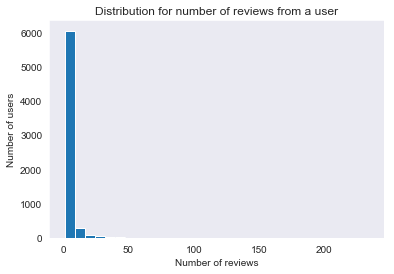

In [8]:
plt.hist(user_ratings.number_of_ratings, bins=30)
plt.title('Distribution for number of reviews from a user')
plt.xlabel('Number of reviews')
plt.ylabel('Number of users')

In [9]:
game_ratings = pd.DataFrame()
game_ratings['number_of_ratings'] = df.groupby(['name'])['score'].count()
game_ratings.sort_values(by='number_of_ratings', ascending=False).head(10)

,number_of_ratings
name,
Grand-Theft-Auto-IV,199
Fallout-3,155
Call-of-Duty-4:-Modern-Warfare,152
Metal-Gear-Solid-4:-Guns-of-the-Patriots,150
BioShock,135
Batman:-Arkham-Asylum,131
Borderlands,130
Assassin's-Creed,121
Mass-Effect,120


In [10]:
len(game_ratings[game_ratings.number_of_ratings == 1])

1687

In [11]:
len(game_ratings)

4223

Text(0, 0.5, 'Number of games')

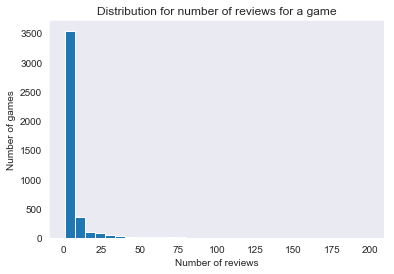

In [12]:
plt.hist(game_ratings.number_of_ratings, bins=30)
plt.title('Distribution for number of reviews for a game')
plt.xlabel('Number of reviews')
plt.ylabel('Number of games')

In [13]:
def stringtolist(value):
    if type(value) == float:
        return np.nan
    else:
        return ast.literal_eval(value)

In [15]:
df['genres'] = df['genres'].apply(lambda x: stringtolist(x))
df['developers'] = df['developers'].apply(lambda x: stringtolist(x))
df['franchises'] = df['franchises'].apply(lambda x: stringtolist(x))
df['platforms'] = df['platforms'].apply(lambda x: stringtolist(x))
df['publishers'] = df['publishers'].apply(lambda x: stringtolist(x))
df['characters'] = df['characters'].apply(lambda x: stringtolist(x))
df['concepts'] = df['concepts'].apply(lambda x: stringtolist(x))
df['similar_games'] = df['similar_games'].apply(lambda x: stringtolist(x))
df['themes'] = df['themes'].apply(lambda x: stringtolist(x))
df['rev_deck'] = df['rev_deck'].apply(lambda x: stringtolist(x))
df['game_deck'] = df['game_deck'].apply(lambda x: stringtolist(x))

In [16]:
df['rev_body'] = df['rev_body'].apply(lambda x: stringtolist(x))

In [14]:
df['game_body'] = df['game_body'].apply(lambda x: stringtolist(x))

In [17]:
df = df.replace(np.nan,'',regex=True)

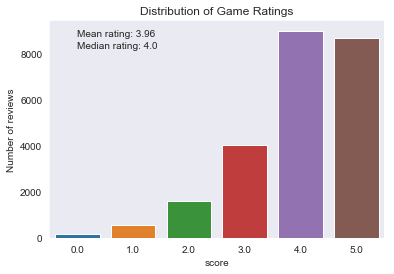

In [18]:
sns.set_style('dark')
sns.countplot(x='score', data=df).set_title('Distribution of Game Ratings')
plt.ylabel('Number of reviews')
plt.text(0, 8750, s='Mean rating: ' + str(round(np.mean(df.score.values),2)))
plt.text(0, 8250, s='Median rating: ' + str(np.median(df.score.values)))
plt.show()

In [19]:
def distribute(data, title1, title2):
    count = {}
    keys = []
    values = []
    for names in data:
        if type(names) == float:
            continue
        else:
            for name in names:
                if name in count:
                    count[name] += 1
                else:
                    count[name] = 1

    count_list = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

    for key, value in count_list:
        keys.append(key)
        values.append(value)
        
    if len(keys) >= 60:
        keys = keys[:10]
        values = values[:10]
        title1 = title1 + ' (top ten popular)'
        
    top_ten = keys[:10]
    print(top_ten)
    for t in top_ten:
        print(t)
    fig, ax = plt.subplots(figsize=[15,7])

    x_pos = np.arange(len(keys))

    ax.bar(x_pos, values, align='center')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(keys, fontsize=14, rotation = -45,  ha="left", rotation_mode="anchor")
  
    ax.set_ylabel('Number of reviews', fontsize=14)
    ax.set_title(title1, fontsize=16)

    plt.show()

    box_list = []
    mean_list = []
    
    for name in top_ten:
        temp = df[data.apply(lambda x: name in x)]
        box_list.append(temp.score.values)
        mean_list.append(np.mean(temp.score))

    fig, ax2 = plt.subplots(figsize=[18,7])

    ax2.boxplot(box_list)

    ax2.set_title(title2)

    ax2.set_xticklabels(top_ten)

    for x in np.linspace(0.6, 9.6, 10):
        plt.text(x, 5.10, s='Mean rating: ' + str(round(mean_list[int(x-0.6)],2)))
    
    
    plt.show()

['Action', 'Action-Adventure', 'Shooter', 'First-Person-Shooter', 'Role-Playing', 'Platformer', 'Adventure', 'Puzzle', 'Strategy', 'Driving/Racing']
Action
Action-Adventure
Shooter
First-Person-Shooter
Role-Playing
Platformer
Adventure
Puzzle
Strategy
Driving/Racing


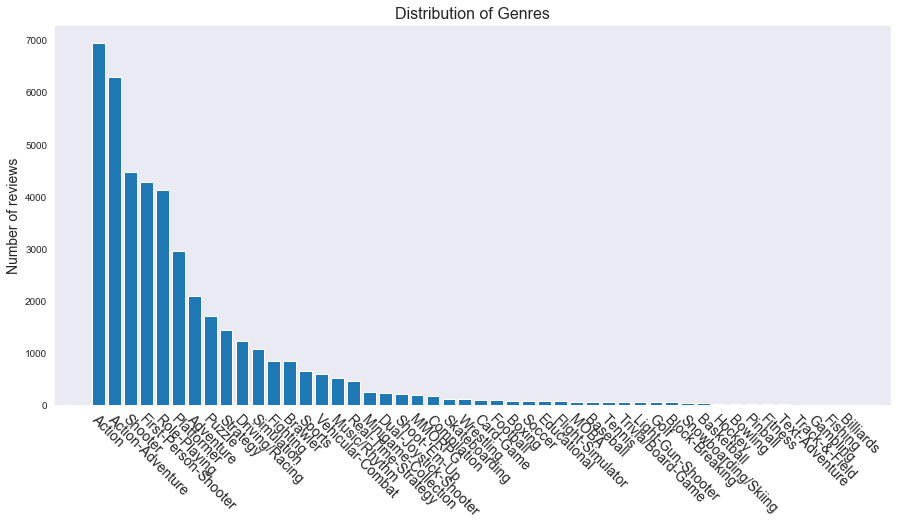

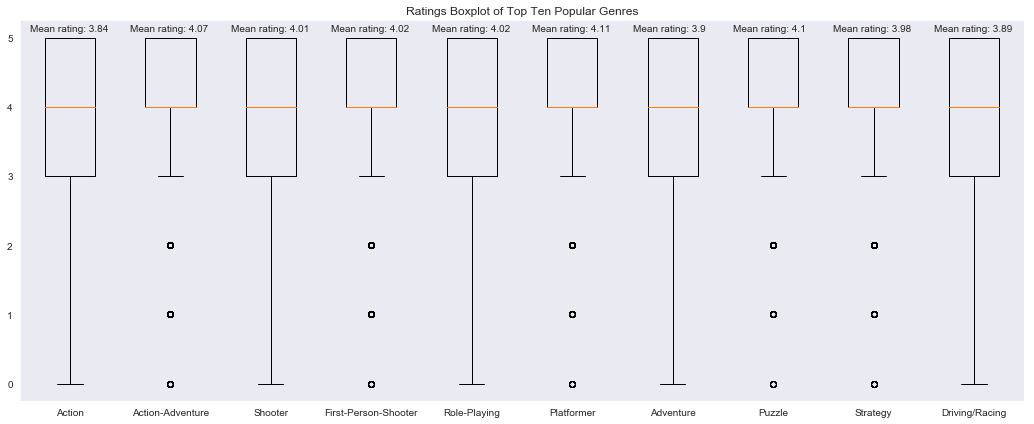

In [20]:
distribute(df.genres, 'Distribution of Genres', 'Ratings Boxplot of Top Ten Popular Genres')

['Sci-Fi', 'Fantasy', 'Comedy', 'Horror', 'Alternate-Historical', 'Modern-Military', 'Crime', 'Post-Apocalyptic', 'Anime', 'Espionage']
Sci-Fi
Fantasy
Comedy
Horror
Alternate-Historical
Modern-Military
Crime
Post-Apocalyptic
Anime
Espionage


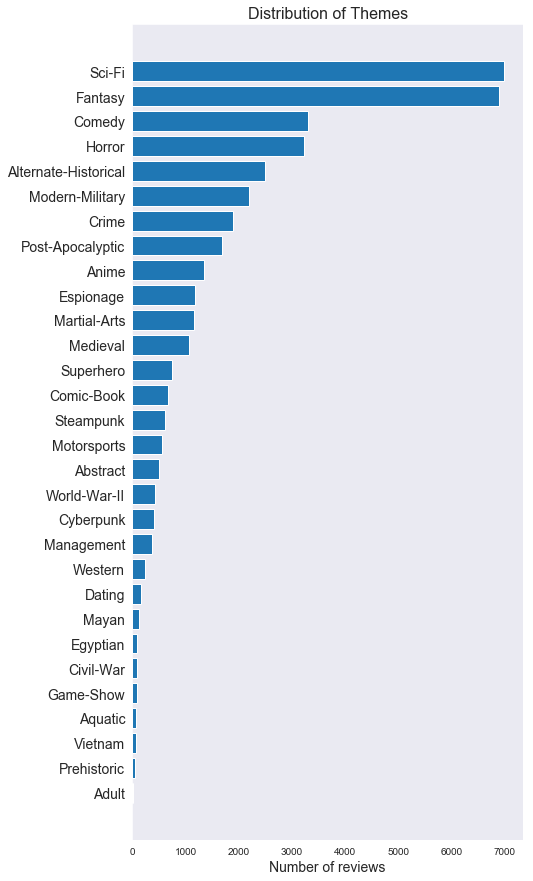

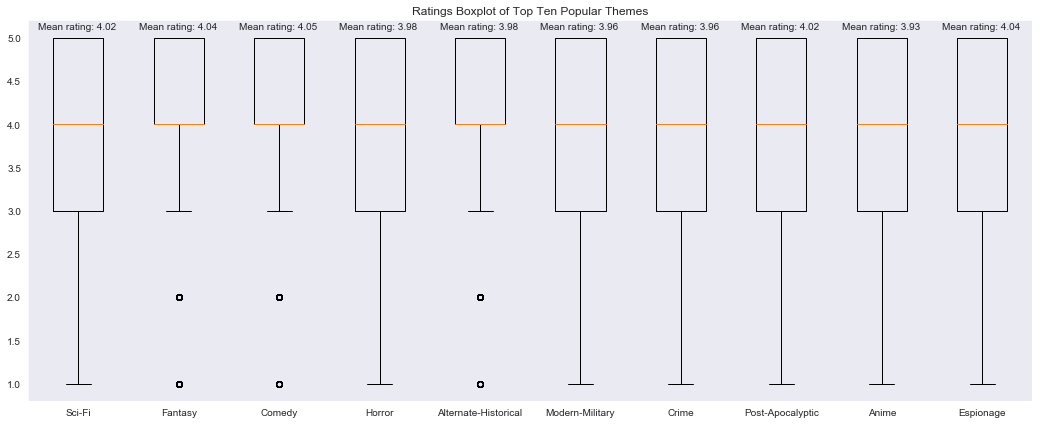

In [38]:
distribute(df.themes, 'Distribution of Themes', 'Ratings Boxplot of Top Ten Popular Themes')

['Achievements', 'Polygonal-3D', 'Digital-Distribution', 'Steam', 'PlayStation-Trophies', 'Voice-Acting', 'Death', 'Health', 'Jump', 'Male-Protagonists']
Achievements
Polygonal-3D
Digital-Distribution
Steam
PlayStation-Trophies
Voice-Acting
Death
Health
Jump
Male-Protagonists


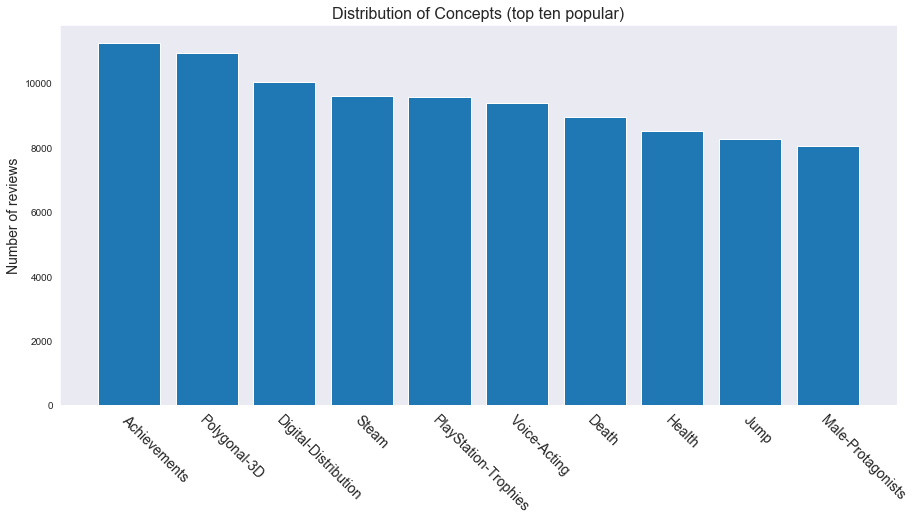

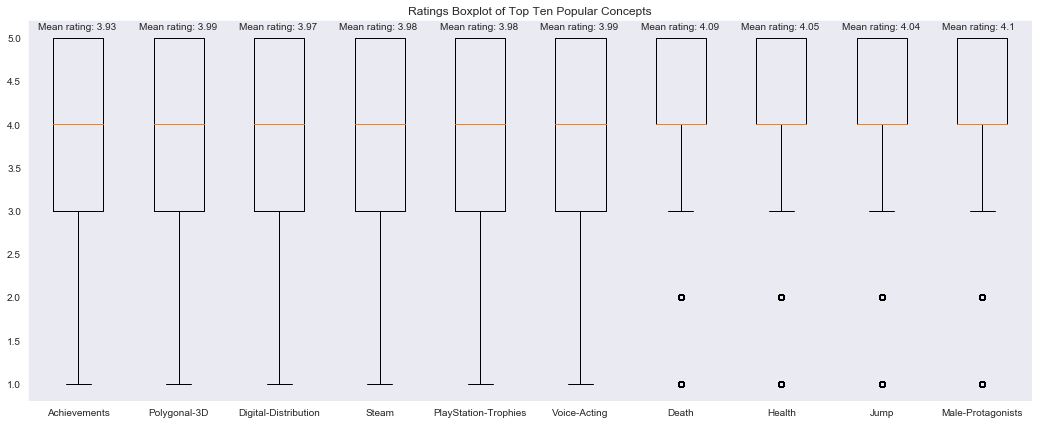

In [56]:
distribute(df.concepts, 'Distribution of Concepts', 'Ratings Boxplot of Top Ten Popular Concepts')

['Mario', 'Jack', 'Luigi', 'Princess-Peach', 'Bowser', 'Toad', 'Raiden', 'Death', 'Lakitu', 'Yoshi']
Mario
Jack
Luigi
Princess-Peach
Bowser
Toad
Raiden
Death
Lakitu
Yoshi


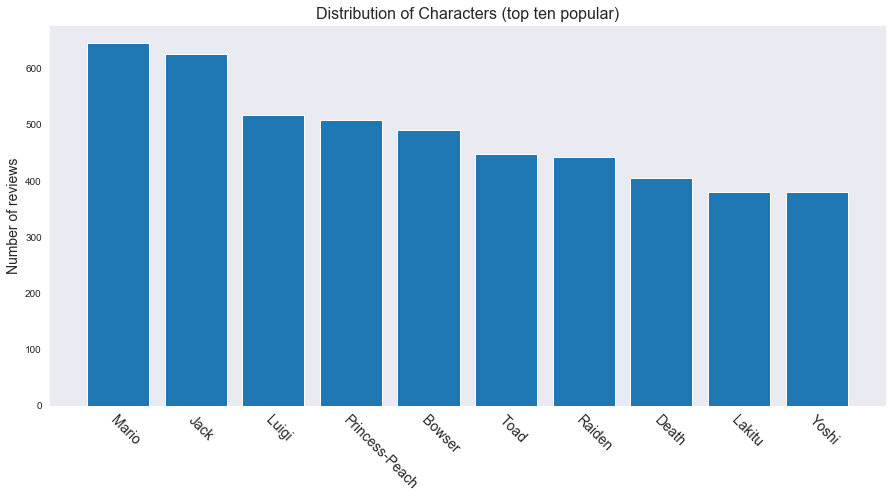

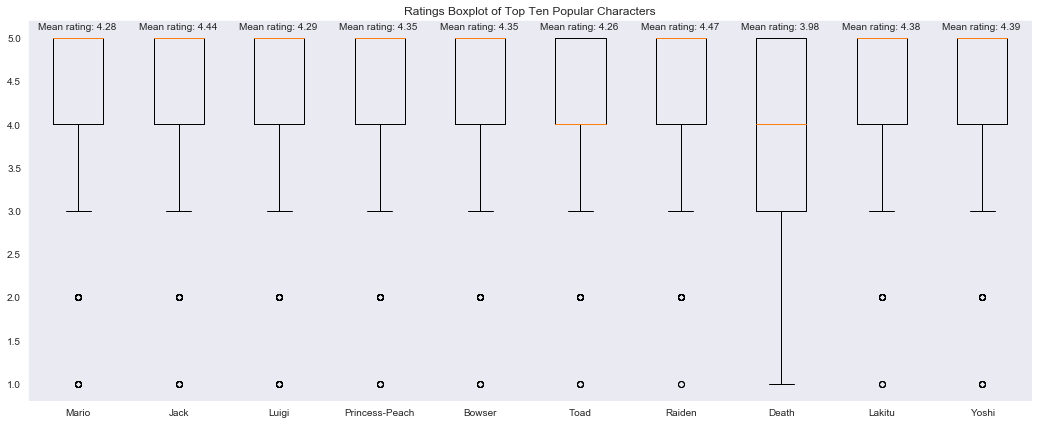

In [20]:
distribute(df.characters, 'Distribution of Characters', 'Ratings Boxplot of Top Ten Popular Characters')

['Call-of-Duty', 'Mario', 'DC-Universe', "Assassin's-Creed", 'Grand-Theft-Auto', 'Modern-Warfare', 'Metal-Gear', 'Battlefield', 'Batman', 'Final-Fantasy']
Call-of-Duty
Mario
DC-Universe
Assassin's-Creed
Grand-Theft-Auto
Modern-Warfare
Metal-Gear
Battlefield
Batman
Final-Fantasy


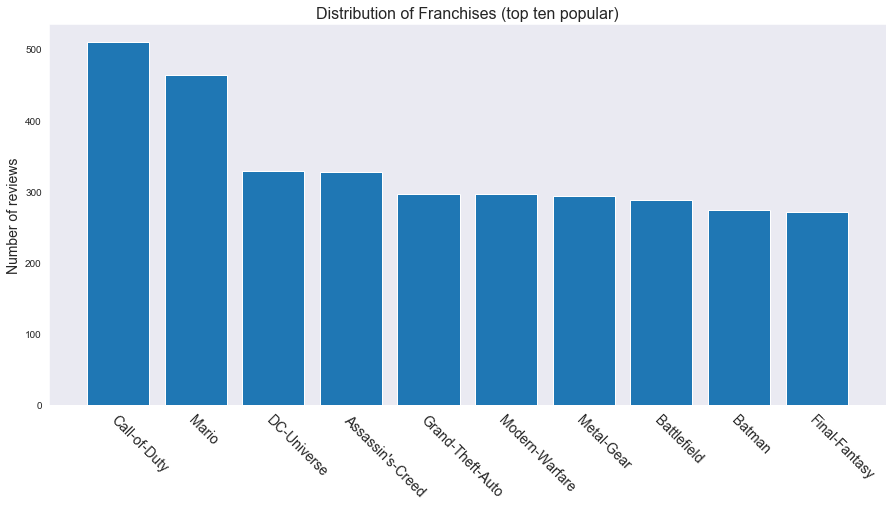

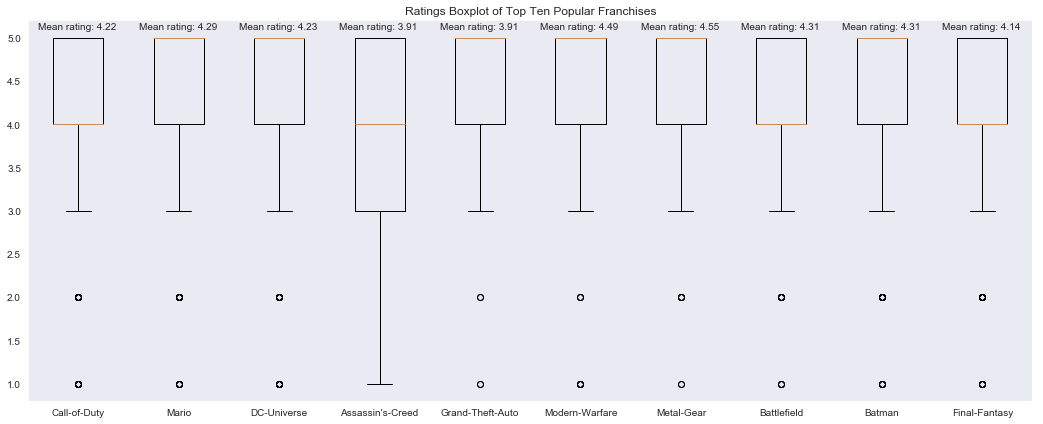

In [23]:
distribute(df.franchises, 'Distribution of Franchises', 'Ratings Boxplot of Top Ten Popular Franchises')

['PC', 'Xbox-360', 'PlayStation-3', 'Xbox-360-Games-Store', 'PlayStation-Network-(PS3)', 'Mac', 'PlayStation-4', 'Xbox-One', 'PlayStation-2', 'iPhone']
PC
Xbox-360
PlayStation-3
Xbox-360-Games-Store
PlayStation-Network-(PS3)
Mac
PlayStation-4
Xbox-One
PlayStation-2
iPhone


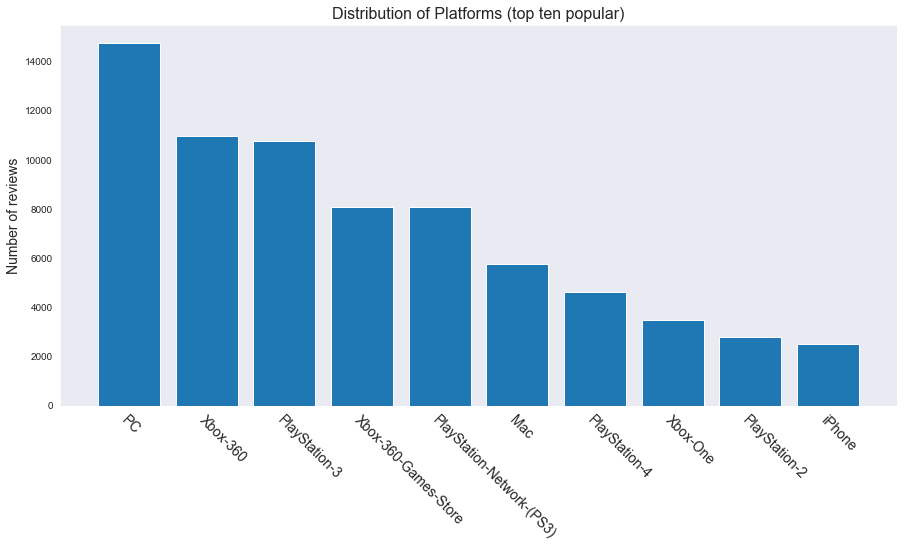

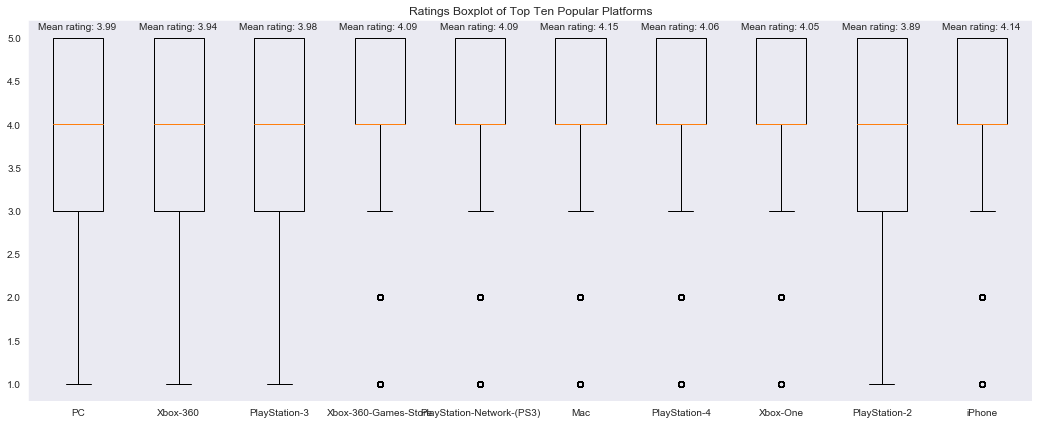

In [24]:
distribute(df.platforms, 'Distribution of Platforms', 'Ratings Boxplot of Top Ten Popular Platforms')

['Electronic-Arts', 'Xbox-Game-Studios', 'Nintendo', 'Sony-Interactive-Entertainment-America', 'Ubisoft-Entertainment', 'Activision', 'Square-Enix', 'Sony-Interactive-Entertainment-Europe', 'Capcom', 'Sega']
Electronic-Arts
Xbox-Game-Studios
Nintendo
Sony-Interactive-Entertainment-America
Ubisoft-Entertainment
Activision
Square-Enix
Sony-Interactive-Entertainment-Europe
Capcom
Sega


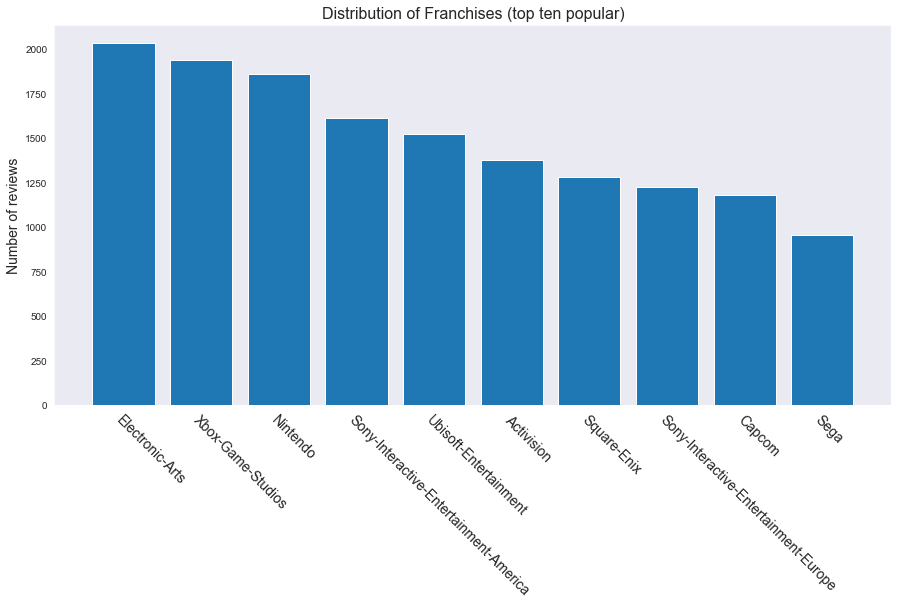

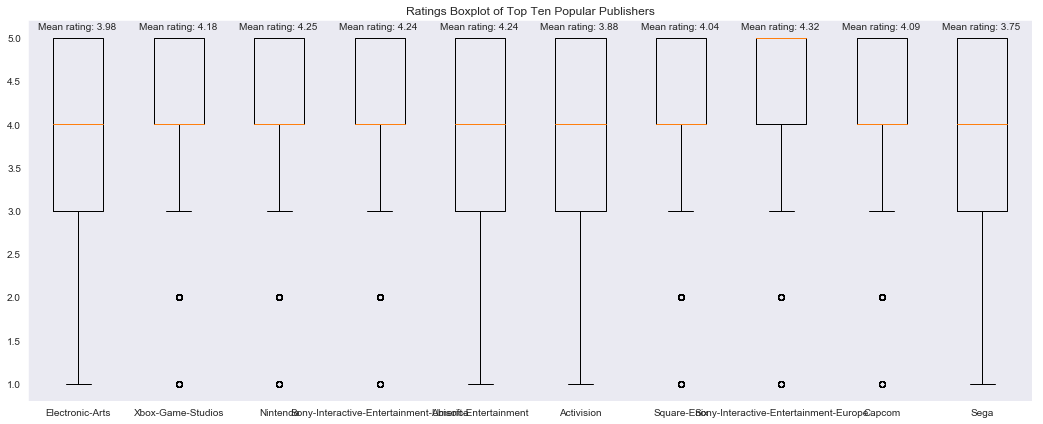

In [25]:
distribute(df.publishers, 'Distribution of Franchises', 'Ratings Boxplot of Top Ten Popular Publishers')

['Ubisoft-Montreal-Studios', 'Capcom', '8-4,-Ltd.', 'Sonic-Mayhem', 'QLOC', 'Aspyr-Media,-Inc.', 'Imagica-Digitalscape-Co.,-Ltd.', 'Nintendo-EAD', 'DICE', 'Valve-Corporation']
Ubisoft-Montreal-Studios
Capcom
8-4,-Ltd.
Sonic-Mayhem
QLOC
Aspyr-Media,-Inc.
Imagica-Digitalscape-Co.,-Ltd.
Nintendo-EAD
DICE
Valve-Corporation


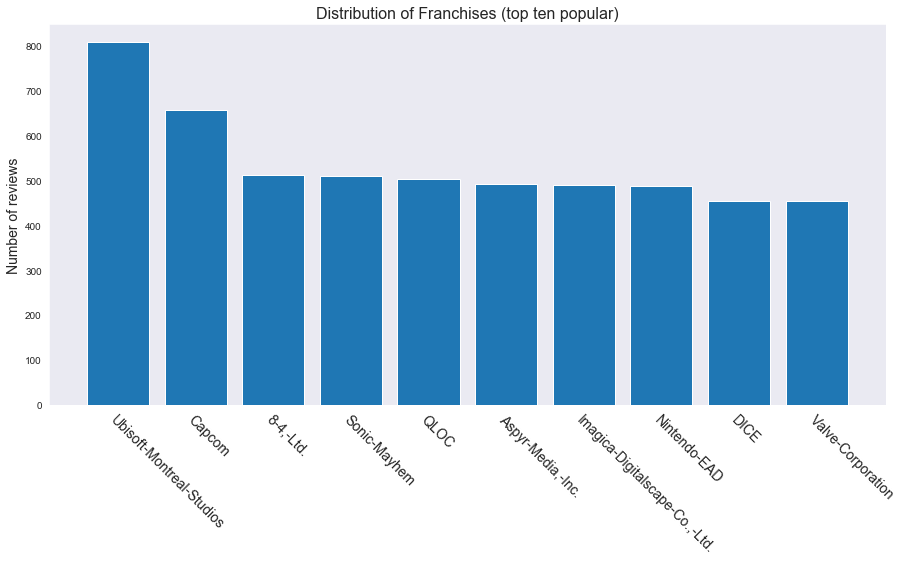

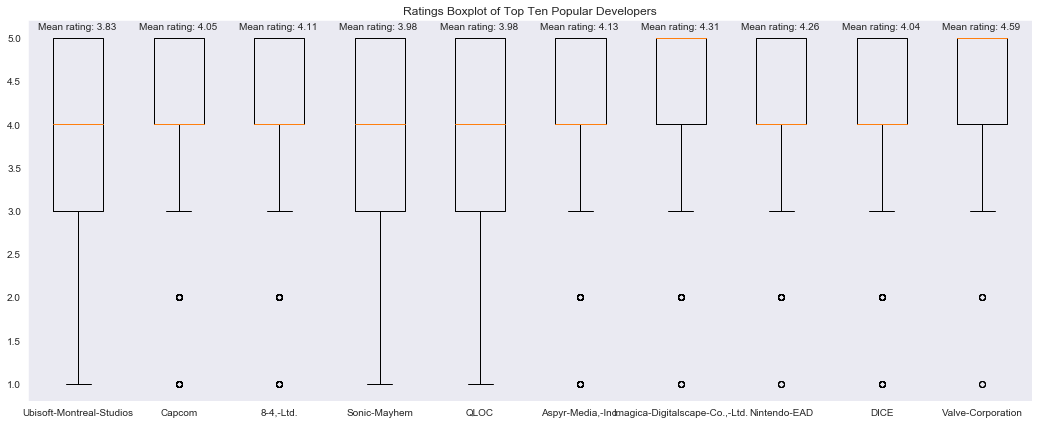

In [26]:
distribute(df.developers, 'Distribution of Franchises', 'Ratings Boxplot of Top Ten Popular Developers')

In [125]:
def ttest(group1, group2):
    group1_n = len(group1)
    group2_n = len(group2)

    group1_mean = np.mean(group1.score)
    group2_mean = np.mean(group2.score)

    group1_std = np.std(group1.score)
    group2_std = np.std(group2.score)
    
    print(stats.ttest_ind_from_stats(group1_mean, group1_std, group1_n, group2_mean, group2_std, group2_n, equal_var=False))
    

In [126]:

action = df[df.genres.apply(lambda x: 'Action' in x)]

act_adv = df[df.genres.apply(lambda x: 'Action-Adventure' in x)]

adv = df[df.genres.apply(lambda x: 'Adventure' in x)]

shoot = df[df.genres.apply(lambda x: 'Shooter' in x)]

fps = df[df.genres.apply(lambda x: 'First-Person-Shooter' in x)]

action.head()


,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
5,2008-07-21 00:49:38,"[call, game, amazing, would, gross, understate...","[grand, theft, auto, eyes, one, best, game, se...",toriko,5.0,"[Roman-Bellic, Playboy-X, Niko-Bellic, Little-...","[Multiple-Endings, Save-Point, Day/Night-Cycle...","[take, role, niko, bellic, serbian, immigrant,...","[overview, welcome, liberty, city, grand, thef...",[Rockstar-North],[Grand-Theft-Auto],"[Action, Shooter]",Grand Theft Auto IV,"[Xbox-360, PlayStation-3, PC]",[Rockstar-Games],"[Gangstar-Vegas, Mafia-III, The-Godfather:-The...",[Crime]
8,2008-07-21 00:54:52,"[one, best, xbox, 360, games, ever, made]","[us, xbox, 360, owners, wating, since, 360, ca...",star_wars117,5.0,"[Marcus-Fenix, Augustus-Cole, Dominic-Santiago...","[Cutscene, Achievements, Leaderboard, Active-R...","[gears, war, tactical, cover, based, sci, fi, ...","[overview, gears, war, third, person, shooter,...","[Epic-Games, The-Coalition, Psyonix-Studios]",[Gears-of-War],"[Action, Shooter]",Gears of War,"[Xbox-360, Xbox-360-Games-Store, PC, Xbox-One]",[Xbox-Game-Studios],"[kill.switch, Dark-Sector, Army-of-Two, Brute-...","[Horror, Sci-Fi]"
10,2008-07-21 00:57:04,"[future, war]","[year, 2142, new, ice, age, slowly, turning, p...",star_wars117,3.0,,"[Cutscene, Sniping, Griefing, Frag, Ragdoll-Ph...","[battlefield, 2142, takes, popular, battlefiel...","[overview, battlefield, 2142, primarily, multi...",[DICE],[Battlefield],"[Action, Shooter, First-Person-Shooter, Vehicu...",Battlefield 2142,"[Mac, PC]",[Electronic-Arts],"[Frontlines:-Fuel-of-War, Enemy-Territory:-Qua...","[Sci-Fi, Modern-Military, Post-Apocalyptic]"
11,2008-07-21 00:57:06,"[sin, punishment, flawed, worthwhile, shooter]","[every, generation, console, games, always, de...",pepsiman,4.0,"[Saki-Amamiya, Airan-Jo, Isa-Jo, Kachi]","[Double-Jump, Cutscene, On-Rails, Difficulty-L...","[produced, treasure, n64, rail, shooter, one, ...","[overview, title, screen, game, rail, shooter,...",[Treasure],[Sin-&-Punishment],"[Action, Shoot-'Em-Up]",Sin & Punishment,"[Nintendo-64, Wii-Shop, Wii-U]",[Nintendo],"[Star-Fox-64, Panzer-Dragoon-Orta, Panzer-Drag...","[Sci-Fi, Anime]"
12,2008-07-21 00:58:45,"[vib, ribbon, charming, somewhat, lacking, rhy...","[conventions, employed, games, within, music, ...",pepsiman,4.0,[Vibri],"[Procedural-Generation, Custom-Soundtrack, 2D,...","[wire, frame, rabbit, vibri, run, though, obst...","[overview, vib, ribbon, music, game, playstati...","[NanaOn-Sha-Co.,-Ltd.]",[Vib-Ribbon],"[Action, Music/Rhythm]",Vib-Ribbon,"[PlayStation, PlayStation-Network-(PS3), PlayS...","[Sony-Interactive-Entertainment-Europe, Sony-I...","[Goo!-Goo!-Soundy, musika, Rhyme-Rider-Keroric...","[Fantasy, Abstract]"


In [130]:
print("Action and Action-Adventure")
ttest(action, act_adv)

Action and Action-Adventure
Ttest_indResult(statistic=-12.28856081167596, pvalue=1.5923210217792941e-34)


In [131]:
print("Action and Adventure")
ttest(action, adv)

Action and Adventure
Ttest_indResult(statistic=-2.1061815922964633, pvalue=0.035251514353291984)


In [134]:
print("Adventure and Action-Adventure")
ttest(adv, act_adv)

Adventure and Action-Adventure
Ttest_indResult(statistic=-6.625084398132424, pvalue=3.955032430980636e-11)


In [132]:
print("Shooter and First Person Shooter")
ttest(shoot, fps)

Shooter and First Person Shooter
Ttest_indResult(statistic=-0.4943226862558967, pvalue=0.6210903155076214)


In [140]:
xbox_360 = df[df.platforms.apply(lambda x: 'Xbox-360' in x)]

ps3 = df[df.platforms.apply(lambda x: 'PlayStation-3' in x)]
ps3.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
5,2008-07-21 00:49:38,"[call, game, amazing, would, gross, understate...","[grand, theft, auto, eyes, one, best, game, se...",toriko,5.0,"[Roman-Bellic, Playboy-X, Niko-Bellic, Little-...","[Multiple-Endings, Save-Point, Day/Night-Cycle...","[take, role, niko, bellic, serbian, immigrant,...","[overview, welcome, liberty, city, grand, thef...",[Rockstar-North],[Grand-Theft-Auto],"[Action, Shooter]",Grand Theft Auto IV,"[Xbox-360, PlayStation-3, PC]",[Rockstar-Games],"[Gangstar-Vegas, Mafia-III, The-Godfather:-The...",[Crime]
6,2008-07-21 00:51:31,"[metal, gear, solid, 4, game, leave, speechless]","[story, solid, snake, old, snake, ever, wish, ...",star_wars117,5.0,"[Solid-Snake, Otacon, Liquid-Snake, Revolver-O...","[Easter-Egg, Quick-Time-Event, Teleportation, ...","[2014, war, become, routine, core, global, eco...","[overview, old, snake, metal, gear, solid, 4, ...","[Kojima-Productions, 8-4,-Ltd., Imagica-Digita...","[Metal-Gear, Metal-Gear-Solid]","[Shooter, Action-Adventure]",Metal Gear Solid 4: Guns of the Patriots,"[PlayStation-3, PlayStation-Network-(PS3)]",[Konami],"[Tom-Clancy's-Splinter-Cell, Tom-Clancy's-Spli...","[Alternate-Historical, Espionage, Modern-Milit..."
7,2008-07-21 00:53:41,"[mgs4, blurs, line, cinematography, gameplay]","[metal, gear, solid, always, praised, sometime...",microwavedapple,4.0,"[Solid-Snake, Otacon, Liquid-Snake, Revolver-O...","[Easter-Egg, Quick-Time-Event, Teleportation, ...","[2014, war, become, routine, core, global, eco...","[overview, old, snake, metal, gear, solid, 4, ...","[Kojima-Productions, 8-4,-Ltd., Imagica-Digita...","[Metal-Gear, Metal-Gear-Solid]","[Shooter, Action-Adventure]",Metal Gear Solid 4: Guns of the Patriots,"[PlayStation-3, PlayStation-Network-(PS3)]",[Konami],"[Tom-Clancy's-Splinter-Cell, Tom-Clancy's-Spli...","[Alternate-Historical, Espionage, Modern-Milit..."
13,2008-07-21 00:58:54,"[intense, gameplay, steals, show]","[bullets, whiz, prone, body, sneak, forest, mo...",artg,5.0,"[Solid-Snake, Otacon, Liquid-Snake, Revolver-O...","[Easter-Egg, Quick-Time-Event, Teleportation, ...","[2014, war, become, routine, core, global, eco...","[overview, old, snake, metal, gear, solid, 4, ...","[Kojima-Productions, 8-4,-Ltd., Imagica-Digita...","[Metal-Gear, Metal-Gear-Solid]","[Shooter, Action-Adventure]",Metal Gear Solid 4: Guns of the Patriots,"[PlayStation-3, PlayStation-Network-(PS3)]",[Konami],"[Tom-Clancy's-Splinter-Cell, Tom-Clancy's-Spli...","[Alternate-Historical, Espionage, Modern-Milit..."
15,2008-07-21 01:00:14,"[okami, swan, song, worthy, clover, name]","[created, time, venerable, developer, clover, ...",pepsiman,5.0,"[Amaterasu, Issun, Orochi, Yami, Sakuya, Sakig...","[Double-Jump, Combo, Boss-Fight, Day/Night-Cyc...","[ōkami, action, adventure, game, goddess, amat...","[overview, ōkami, players, take, control, newl...","[Clover-Studio, Hexa-Drive, Ready-at-Dawn-Stud...",[Ōkami],[Action-Adventure],Ōkami,"[PlayStation-2, PlayStation-3, Wii, PlayStatio...",[Capcom],"[Kameo:-Elements-of-Power, Beyond-Good-&-Evil,...",[Fantasy]


In [141]:
print("Xbox 360 and Ps3")
ttest(xbox_360, ps3)

Xbox 360 and Ps3
Ttest_indResult(statistic=-2.2342939295673148, pvalue=0.02547344267670122)


In [122]:
df = df.drop_duplicates(subset = 'name')

In [123]:
genres = ['Action','Action-Adventure','Shooter','First-Person-Shooter','Role-Playing','Platformer','Adventure','Puzzle','Strategy','Driving/Racing']
perc = []
count = {}
for genre in genres:
    main = df[df.genres.apply(lambda x: genre in x)]
    
    num_of_sim = 0
    num_of_same = 0
    

    
    for games in main.similar_games:
        for game in games:
            num_of_sim += 1
            if game in main.name.unique():
                num_of_same += 1
            else:
                continue
    
    if num_of_sim == 0:
        perc.append(0)
    else: 
        same = round(num_of_same/num_of_sim * 100,1)
        perc.append(same)
perc

[51.7, 48.4, 45.4, 79.3, 76.2, 63.3, 54.4, 50.7, 59.2, 78.2]

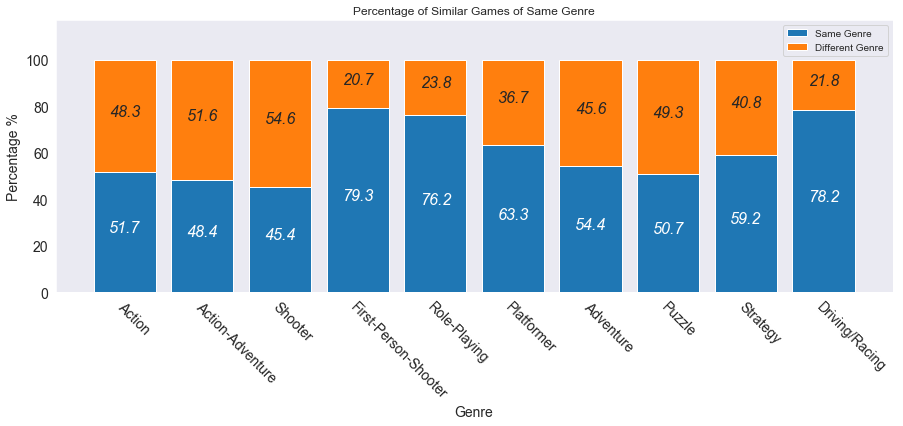

In [124]:
not_perc = []
for num in perc:
    not_perc.append(round(100-num,1))

plt.figure(figsize=[15,5])
plt.ylim([0,117])
plt.bar(genres, perc, label='Same Genre')
plt.bar(genres, not_perc, bottom=perc, label='Different Genre')
plt.title('Percentage of Similar Games of Same Genre')
plt.xticks(rotation = -45, ha='left', rotation_mode="anchor", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)

for tick in range(10):
    plt.text(tick, perc[tick]/2, s = str(perc[tick]), ha='center', fontsize=16, fontstyle = 'oblique', color='white')
    plt.text(tick, perc[tick] + not_perc[tick]/2, s = str(not_perc[tick]), ha='center', fontsize=16, fontstyle = 'oblique')

plt.legend()
plt.show()

In [125]:
themes = ['Sci-Fi','Fantasy','Comedy','Horror','Alternate-Historical','Modern-Military','Crime','Post-Apocalyptic','Anime','Espionage']
perc_theme = []
for theme in themes:
    main = df[df.themes.apply(lambda x: theme in x)]

    num_of_sim = 0
    num_of_same = 0

    for games in main.similar_games:
        for game in games:
            num_of_sim += 1
            if game in main.name.unique():
                num_of_same += 1
            else:
                continue
    
    if num_of_sim == 0:
        perc_theme.append(0)
    else: 
        same = round(num_of_same/num_of_sim * 100,1)
        perc_theme.append(same)
perc_theme

[49.0, 66.3, 41.0, 46.3, 18.6, 42.5, 35.2, 12.9, 42.0, 37.7]

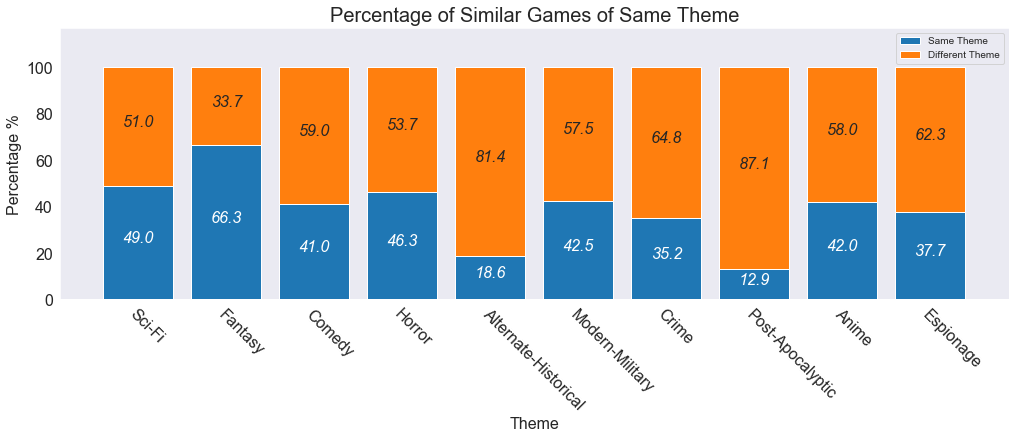

In [126]:
not_perc_theme = []
for num in perc_theme:
    not_perc_theme.append(round(100-num,1))

plt.figure(figsize=[17,5])
plt.ylim([0,117])
plt.bar(themes, perc_theme, label='Same Theme')
plt.bar(themes, not_perc_theme, bottom=perc_theme, label='Different Theme')
plt.title('Percentage of Similar Games of Same Theme', fontsize=20)
plt.xticks(fontsize=16, rotation = -45, ha='left', rotation_mode="anchor")
plt.yticks(fontsize=16)
plt.xlabel('Theme', fontsize=16)
plt.ylabel('Percentage %', fontsize=16)

for tick in range(10):
    plt.text(tick, perc_theme[tick]/2, s = str(perc_theme[tick]), ha='center', fontsize=16, fontstyle='oblique', color='white')
    plt.text(tick, perc_theme[tick] + not_perc_theme[tick]/2, s = str(not_perc_theme[tick]), ha='center', fontsize=16, fontstyle='oblique')

plt.legend()
plt.show()  

In [127]:
concs = ['Achievements', 'Polygonal-3D', 'Digital-Distribution', 'Steam', 'PlayStation-Trophies', 'Voice-Acting', 'Death', 'Health', 'Jump', 'Male-Protagonists']
perc_conc = []
for conc in concs:
    main = df[df.concepts.apply(lambda x: conc in x)]

    num_of_sim = 0
    num_of_same = 0

    for games in main.similar_games:
        for game in games:
            num_of_sim += 1
            if game in main.name.unique():
                num_of_same += 1
            else:
                continue
    
    if num_of_sim == 0:
        perc_conc.append(0)
    else: 
        same = round(num_of_same/num_of_sim * 100,1)
        perc_conc.append(same)
perc_conc

[45.6, 52.7, 45.2, 47.4, 41.0, 42.6, 46.0, 48.5, 53.7, 36.0]

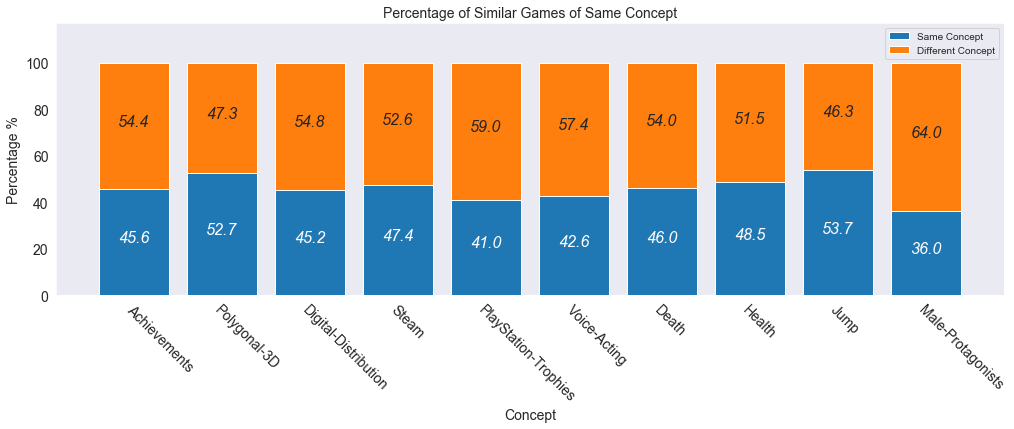

In [128]:
not_perc_conc = []
for num in perc_conc:
    not_perc_conc.append(round(100-num,1))

plt.figure(figsize=[17,5])
plt.ylim([0,117])
plt.bar(concs, perc_conc, label='Same Concept')
plt.bar(concs, not_perc_conc, bottom=perc_conc, label='Different Concept')
plt.title('Percentage of Similar Games of Same Concept', fontsize=14)
plt.xticks(fontsize=14, rotation = -45, ha='left', rotation_mode="anchor")
plt.yticks(fontsize=14)
plt.xlabel('Concept', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)

for tick in range(10):
    plt.text(tick, perc_conc[tick]/2, s = str(perc_conc[tick]), ha='center', fontsize=16, fontstyle='oblique', color='white')
    plt.text(tick, perc_conc[tick] + not_perc_conc[tick]/2, s = str(not_perc_conc[tick]), ha='center', fontsize=16, fontstyle='oblique')

plt.legend()
plt.show()  

In [129]:
chars = ['Mario', 'Jack', 'Luigi', 'Princess-Peach', 'Bowser', 'Toad', 'Raiden', 'Death', 'Lakitu', 'Yoshi']
perc_char = []
for char in chars:
    main = df[df.characters.apply(lambda x: char in x)]

    num_of_sim = 0
    num_of_same = 0

    for games in main.similar_games:
        for game in games:
            num_of_sim += 1
            if game in main.name.unique():
                num_of_same += 1
            else:
                continue
    
    if num_of_sim == 0:
        perc_char.append(0)
    else: 
        same = round(num_of_same/num_of_sim * 100,1)
        perc_char.append(same)
perc_char

[15.4, 0.8, 10.2, 11.6, 8.3, 9.3, 2.2, 2.9, 8.8, 7.1]

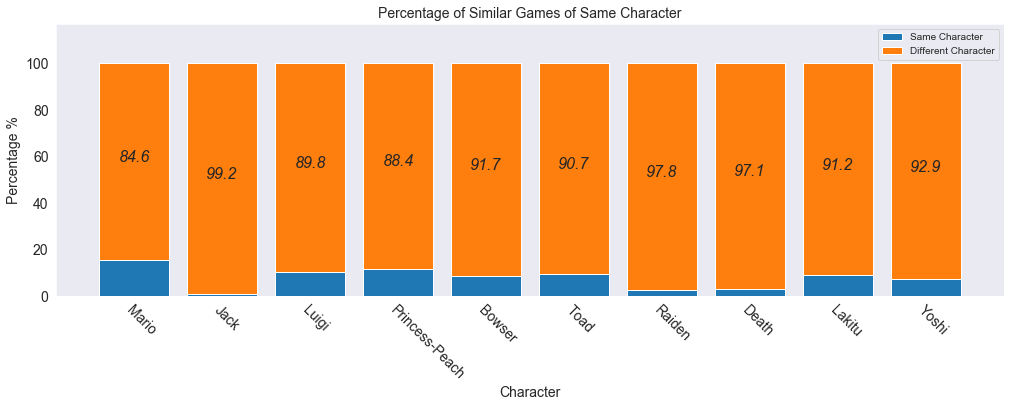

In [130]:
not_perc_char = []
for num in perc_char:
    not_perc_char.append(round(100-num,1))

plt.figure(figsize=[17,5])
plt.ylim([0,117])
plt.bar(chars, perc_char, label='Same Character')
plt.bar(chars, not_perc_char, bottom=perc_char, label='Different Character')
plt.title('Percentage of Similar Games of Same Character', fontsize=14)
plt.xticks(fontsize=14, rotation = -45, ha='left', rotation_mode="anchor")
plt.yticks(fontsize=14)
plt.xlabel('Character', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)

for tick in range(10):
    plt.text(tick, perc_char[tick] + not_perc_char[tick]/2, s = str(not_perc_char[tick]), ha='center', fontsize=16, fontstyle='oblique')

plt.legend()
plt.show()  

In [131]:
frans = ['Call-of-Duty', 'Mario', 'DC-Universe', "Assassin's-Creed", 'Grand-Theft-Auto', 'Modern-Warfare', 'Metal-Gear', 'Battlefield', 'Batman', 'Final-Fantasy']
perc_fran = []
for fran in frans:
    main = df[df.franchises.apply(lambda x: fran in x)]

    num_of_sim = 0
    num_of_same = 0

    for games in main.similar_games:
        for game in games:
            num_of_sim += 1
            if game in main.name.unique():
                num_of_same += 1
            else:
                continue
    
    if num_of_sim == 0:
        perc_fran.append(0)
    else: 
        same = round(num_of_same/num_of_sim * 100,1)
        perc_fran.append(same)
perc_fran

[1.2, 13.5, 10.7, 0.0, 0.0, 5.3, 9.7, 10.4, 2.0, 2.2]

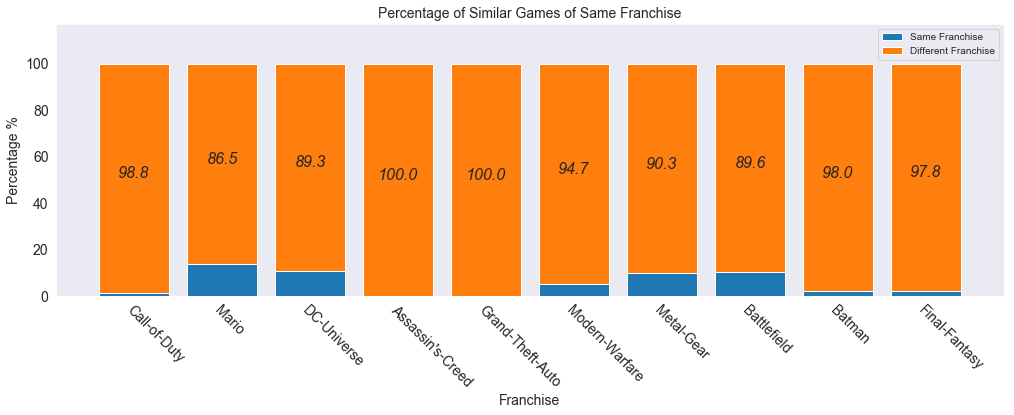

In [132]:
not_perc_fran = []
for num in perc_fran:
    not_perc_fran.append(round(100-num,1))

plt.figure(figsize=[17,5])
plt.ylim([0,117])
plt.bar(frans, perc_fran, label='Same Franchise')
plt.bar(frans, not_perc_fran, bottom=perc_fran, label='Different Franchise')
plt.title('Percentage of Similar Games of Same Franchise', fontsize=14)
plt.xticks(rotation = -45, ha='left', rotation_mode="anchor", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Franchise', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)

for tick in range(10):
    plt.text(tick, perc_fran[tick] + not_perc_fran[tick]/2, s = str(not_perc_fran[tick]), ha='center', fontsize=16, fontstyle='oblique')

plt.legend()
plt.show()  

In [133]:
plats = ['PC', 'Xbox-360', 'PlayStation-3', 'Xbox-360-Games-Store', 'PlayStation-Network-(PS3)', 'Mac', 'PlayStation-4', 'Xbox-One', 'PlayStation-2', 'iPhone']
perc_plat = []
for plat in plats:
    main = df[df.platforms.apply(lambda x: plat in x)]

    num_of_sim = 0
    num_of_same = 0

    for games in main.similar_games:
        for game in games:
            num_of_sim += 1
            if game in main.name.unique():
                num_of_same += 1
            else:
                continue
    
    if num_of_sim == 0:
        perc_plat.append(0)
    else: 
        same = round(num_of_same/num_of_sim * 100,1)
        perc_plat.append(same)
perc_plat

[71.8, 49.3, 46.6, 31.4, 36.6, 42.9, 29.8, 26.8, 46.4, 20.3]

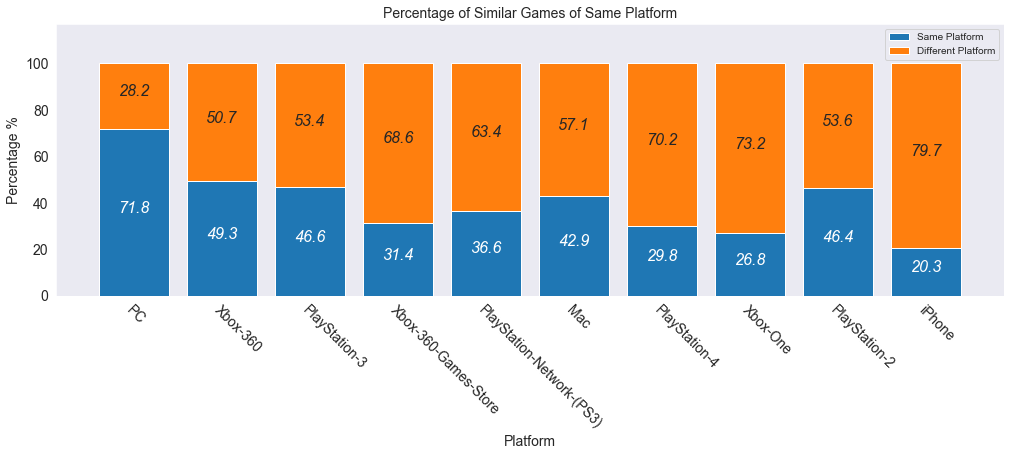

In [134]:
not_perc_plat = []
for num in perc_plat:
    not_perc_plat.append(round(100-num,1))

plt.figure(figsize=[17,5])
plt.ylim([0,117])
plt.bar(plats, perc_plat, label='Same Platform')
plt.bar(plats, not_perc_plat, bottom=perc_plat, label='Different Platform')
plt.title('Percentage of Similar Games of Same Platform', fontsize=14)
plt.xticks(rotation = -45, ha='left', rotation_mode="anchor", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)

for tick in range(10):
    plt.text(tick, perc_plat[tick]/2, s = str(perc_plat[tick]), ha='center', fontsize=16, fontstyle='oblique', color='white')
    plt.text(tick, perc_plat[tick] + not_perc_plat[tick]/2, s = str(not_perc_plat[tick]), ha='center', fontsize=16, fontstyle='oblique')

plt.legend()
plt.show()  

In [135]:
pubs = ['Electronic-Arts', 'Xbox-Game-Studios', 'Nintendo', 'Sony-Interactive-Entertainment-America', 'Ubisoft-Entertainment', 'Activision', 'Square-Enix', 'Sony-Interactive-Entertainment-Europe', 'Capcom', 'Sega']
perc_pub = []
for pub in pubs:
    main = df[df.publishers.apply(lambda x: pub in x)]

    num_of_sim = 0
    num_of_same = 0

    for games in main.similar_games:
        for game in games:
            num_of_sim += 1
            if game in main.name.unique():
                num_of_same += 1
            else:
                continue
    
    if num_of_sim == 0:
        perc_pub.append(0)
    else: 
        same = round(num_of_same/num_of_sim * 100,1)
        perc_pub.append(same)
perc_pub

[14.5, 13.4, 27.2, 20.1, 11.0, 12.5, 19.3, 11.8, 21.6, 17.0]

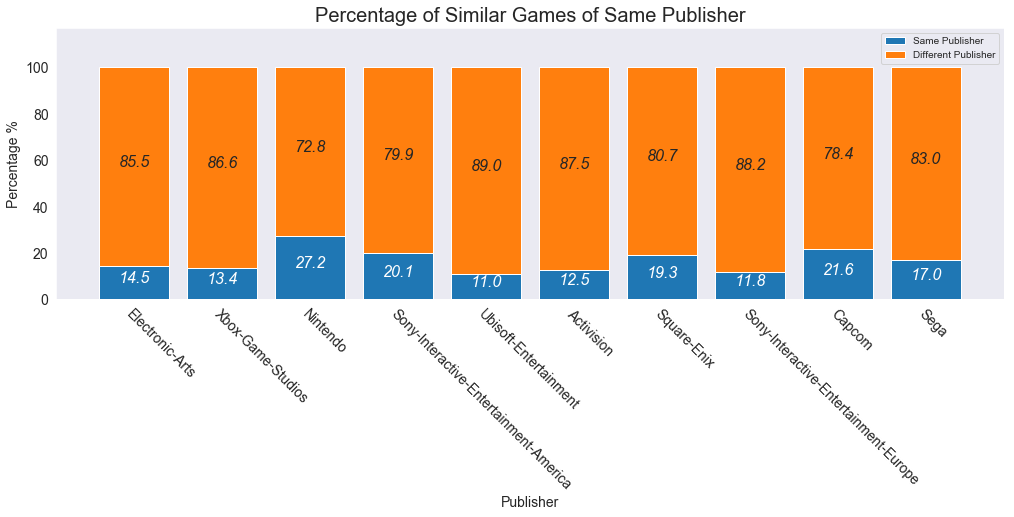

In [136]:
not_perc_pub = []
for num in perc_pub:
    not_perc_pub.append(round(100-num,1))

plt.figure(figsize=[17,5])
plt.ylim([0,117])
plt.bar(pubs, perc_pub, label='Same Publisher')
plt.bar(pubs, not_perc_pub, bottom=perc_pub, label='Different Publisher')
plt.xticks(rotation = -45,  ha="left", rotation_mode="anchor")
plt.title('Percentage of Similar Games of Same Publisher', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)

for tick in range(10):
    plt.text(tick, perc_pub[tick]/2, s = str(perc_pub[tick]), ha='center', fontsize=16, fontstyle='oblique', color='white')
    plt.text(tick, perc_pub[tick] + not_perc_pub[tick]/2, s = str(not_perc_pub[tick]), ha='center', fontsize=16, fontstyle='oblique')

plt.legend()
plt.show()  

In [137]:
devs = ['Ubisoft-Montreal-Studios', 'Capcom', '8-4,-Ltd.', 'Sonic-Mayhem', 'QLOC', 'Aspyr-Media,-Inc.', 'Imagica-Digitalscape-Co.,-Ltd.', 'Nintendo-EAD', 'DICE', 'Valve-Corporation']
perc_dev = []
for dev in devs:
    main = df[df.developers.apply(lambda x: dev in x)]

    num_of_sim = 0
    num_of_same = 0

    for games in main.similar_games:
        for game in games:
            num_of_sim += 1
            if game in main.name.unique():
                num_of_same += 1
            else:
                continue
    
    if num_of_sim == 0:
        perc_dev.append(0)
    else: 
        same = round(num_of_same/num_of_sim * 100,1)
        perc_dev.append(same)
perc_dev

[6.4, 13.4, 11.9, 3.4, 1.1, 1.7, 5.0, 7.9, 12.4, 5.6]

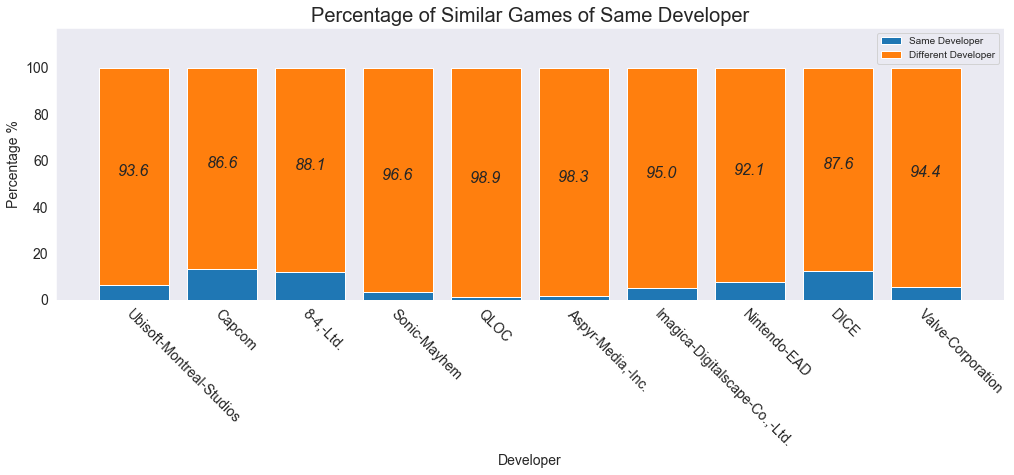

In [138]:
not_perc_dev = []
for num in perc_dev:
    not_perc_dev.append(round(100-num,1))

plt.figure(figsize=[17,5])
plt.ylim([0,117])
plt.bar(devs, perc_dev, label='Same Developer')
plt.bar(devs, not_perc_dev, bottom=perc_dev, label='Different Developer')
plt.title('Percentage of Similar Games of Same Developer', fontsize=20)
plt.xticks(rotation = -45, ha='left', rotation_mode="anchor", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Developer', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)

for tick in range(10):
    plt.text(tick, perc_dev[tick] + not_perc_dev[tick]/2, s = str(not_perc_dev[tick]), ha='center', fontsize=16, fontstyle='oblique')

plt.legend()
plt.show()  

In [23]:
unique = []
for genres in df.genres:
    for genre in genres:
        if genre in unique:
            continue
        else:
            unique.append(genre)
unique = sorted(unique)
print(unique)
print(len(unique))

['Action', 'Action-Adventure', 'Adventure', 'Baseball', 'Basketball', 'Billiards', 'Block-Breaking', 'Bowling', 'Boxing', 'Brawler', 'Card-Game', 'Compilation', 'Driving/Racing', 'Dual-Joystick-Shooter', 'Educational', 'Fighting', 'First-Person-Shooter', 'Fishing', 'Fitness', 'Flight-Simulator', 'Football', 'Gambling', 'Golf', 'Hockey', 'Light-Gun-Shooter', 'MMORPG', 'MOBA', 'Minigame-Collection', 'Music/Rhythm', 'Pinball', 'Platformer', 'Puzzle', 'Real-Time-Strategy', 'Role-Playing', "Shoot-'Em-Up", 'Shooter', 'Simulation', 'Skateboarding', 'Snowboarding/Skiing', 'Soccer', 'Sports', 'Strategy', 'Tennis', 'Text-Adventure', 'Track-&-Field', 'Trivia/Board-Game', 'Vehicular-Combat', 'Wrestling']
48


Text(0.5, 1.0, 'Genre Associations')

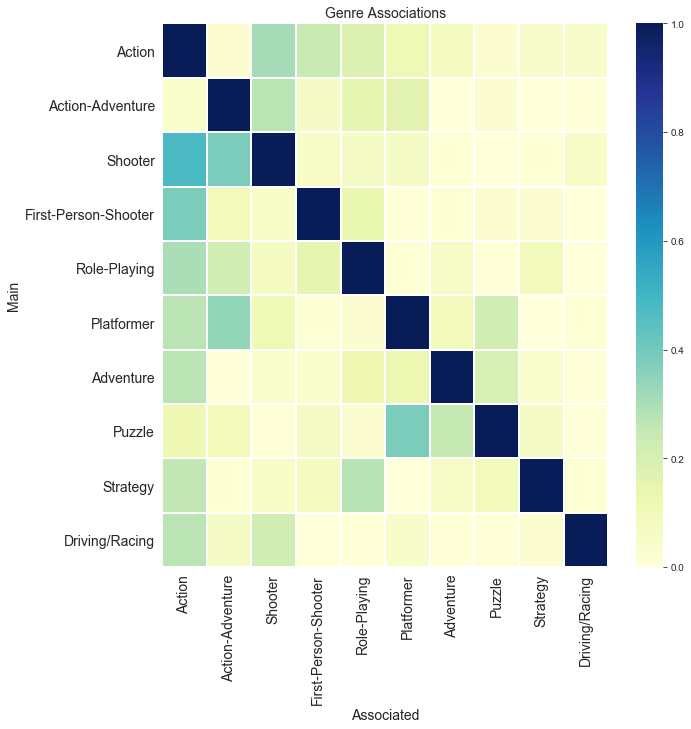

In [24]:
count = {}
keys = []
values = []
for names in df.genres:
    if type(names) == float:
        continue
    else:
        for name in names:
            if name in count:
                count[name] += 1
            else:
                count[name] = 1

count_list = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

for key, value in count_list[:10]:
    keys.append(key)
    values.append(value)

all_counts = []

for genres in keys:
    genre = df[df.genres.apply(lambda x: genres in x)]
    count = {}

    for genres in genre.genres:
        for name in genres:
            if name not in keys:
                continue
            else:
                if name in count:
                    count[name] += 1
                else:
                    count[name] = 0
    highest = max(count.values())   
    
    for genres in keys:
        if genres not in count:
            count[genres] = 0
    counts = []
    for key in keys:
        counts.append(round(count[key] / max(count.values()),2))
    all_counts.append(counts)

plt.figure(figsize = [10,10])

sns.heatmap(all_counts, linewidth=1, xticklabels=keys, yticklabels=keys, cmap='YlGnBu')
plt.yticks(rotation=0, fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Main', fontsize=14)
plt.xlabel('Associated', fontsize=14)

plt.title("Genre Associations", fontsize=14)

In [25]:
all_counts = []

for genres in unique:
    genre = df[df.genres.apply(lambda x: genres in x)]
    count = {}

    for genres in genre.genres:
        for name in genres:
            if name in count:
                count[name] += 1
            else:
                count[name] = 0
    highest = max(count.values())            
    for genres in unique:
        if genres not in count:
            count[genres] = 0
    
    count_list = sorted(count.items())
    counts = []
    for name, num in count_list:
        num = round(num / highest, 2)
        counts.append(num)
    all_counts.append(counts)


Text(0.5, 1.0, 'Genre Associations')

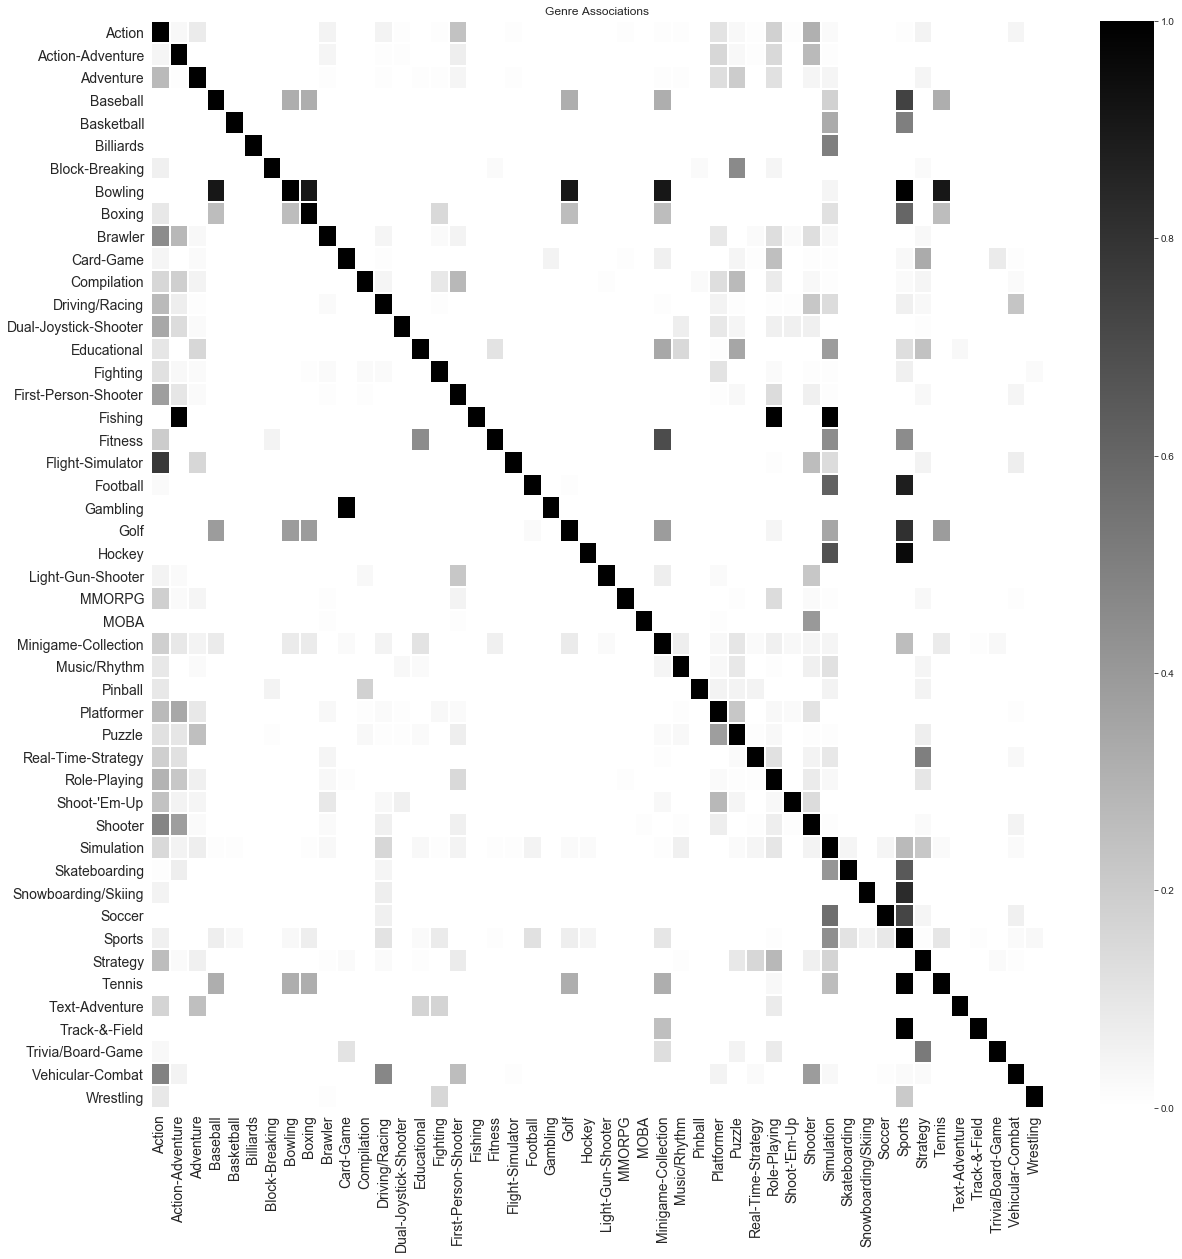

In [26]:
plt.figure(figsize = [20,20])

sns.heatmap(all_counts, linewidth=1, xticklabels=unique, yticklabels=unique, cmap='binary')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Genre Associations")

Text(0.5, 1.0, 'Theme Associations')

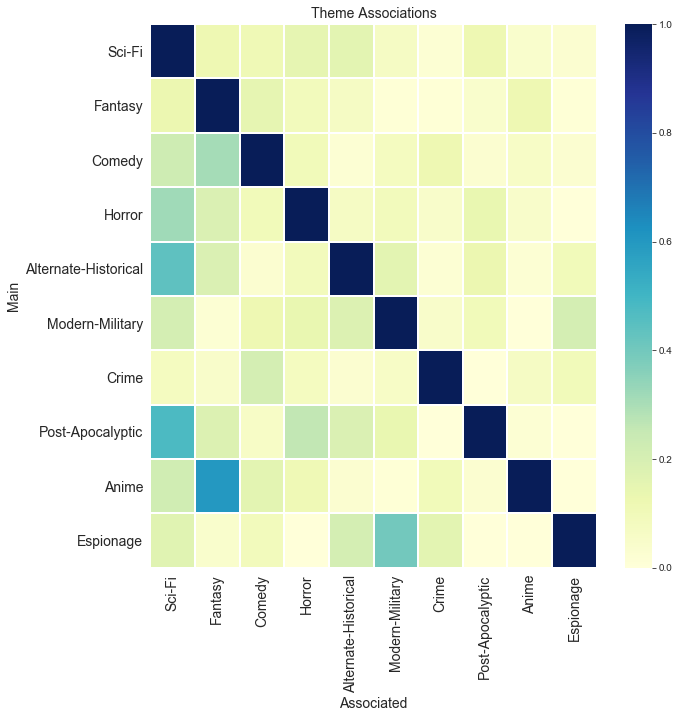

In [27]:
count = {}
keys = []
values = []
for names in df.themes:
    if type(names) == float:
        continue
    else:
        for name in names:
            if name in count:
                count[name] += 1
            else:
                count[name] = 1

count_list = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

for key, value in count_list[:10]:
    keys.append(key)
    values.append(value)
all_counts = []

for themes in keys:
    theme = df[df.themes.apply(lambda x: themes in x)]
    count = {}

    for themes in theme.themes:
        for name in themes:
            if name not in keys:
                continue
            else:
                if name in count:
                    count[name] += 1
                else:
                    count[name] = 0
    highest = max(count.values())   
    
    for themes in keys:
        if themes not in count:
            count[themes] = 0
    counts = []
    for key in keys:
        counts.append(round(count[key] / max(count.values()),2))
    all_counts.append(counts)

plt.figure(figsize = [10,10])

sns.heatmap(all_counts, linewidth=1, xticklabels=keys, yticklabels=keys, cmap='YlGnBu')
plt.yticks(rotation=0, fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Main', fontsize=14)
plt.xlabel('Associated', fontsize=14)
plt.title("Theme Associations", fontsize=14)

Text(0.5, 1.0, 'Platforms Associations')

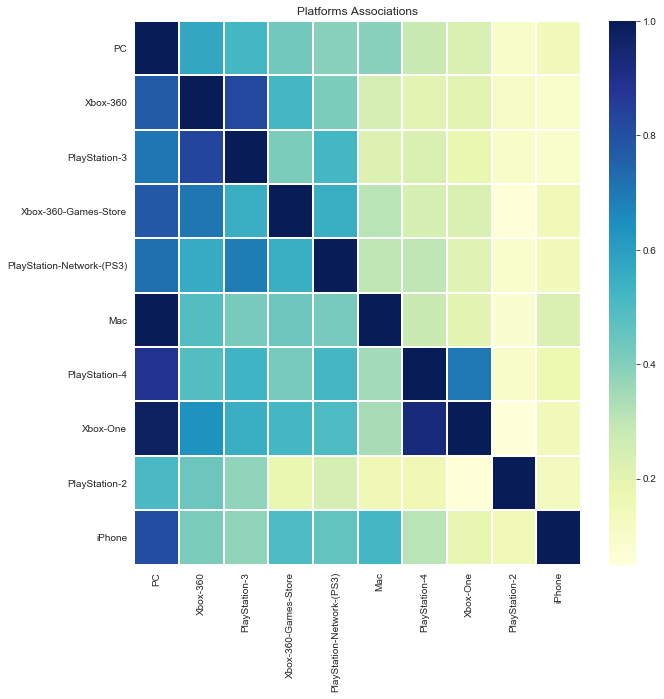

In [28]:
count = {}
keys = []
values = []
for names in df.platforms:
    if type(names) == float:
        continue
    else:
        for name in names:
            if name in count:
                count[name] += 1
            else:
                count[name] = 1

count_list = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

for key, value in count_list[:10]:
    keys.append(key)
    values.append(value)
all_counts = []

for platforms in keys:
    platform = df[df.platforms.apply(lambda x: platforms in x)]
    count = {}

    for platforms in platform.platforms:
        for name in platforms:
            if name not in keys:
                continue
            else:
                if name in count:
                    count[name] += 1
                else:
                    count[name] = 0
    highest = max(count.values())   
    
    for platforms in keys:
        if platforms not in count:
            count[platforms] = 0
    counts = []
    for key in keys:
        counts.append(round(count[key] / max(count.values()),2))
    all_counts.append(counts)

plt.figure(figsize = [10,10])

sns.heatmap(all_counts, linewidth=1, xticklabels=keys, yticklabels=keys, cmap='YlGnBu')
plt.yticks(rotation=0)
plt.title("Platforms Associations")

In [29]:
unique = []
for themes in df.themes:
    for theme in themes:
        if theme in unique:
            continue
        else:
            unique.append(theme)
unique = sorted(unique)
print(unique)
print(len(unique))

['Abstract', 'Adult', 'Alternate-Historical', 'Anime', 'Aquatic', 'Civil-War', 'Comedy', 'Comic-Book', 'Crime', 'Cyberpunk', 'Dating', 'Egyptian', 'Espionage', 'Fantasy', 'Game-Show', 'Horror', 'Management', 'Martial-Arts', 'Mayan', 'Medieval', 'Modern-Military', 'Motorsports', 'Post-Apocalyptic', 'Prehistoric', 'Sci-Fi', 'Steampunk', 'Superhero', 'Vietnam', 'Western', 'World-War-II']
30


In [30]:
all_counts = []
for themes in unique:
    theme = df[df.themes.apply(lambda x: themes in x)]
    count = {}

    for themes in theme.themes:
        for name in themes:
            if name in count:
                count[name] += 1
            else:
                count[name] = 0
    highest = max(count.values())            
    for themes in unique:
        if themes not in count:
            count[themes] = 0
    
    count_list = sorted(count.items())
    counts = []
    for name, num in count_list:
        num = round(num / highest, 2)
        counts.append(num)
    all_counts.append(counts)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 <a list of 30 Text yticklabel objects>)

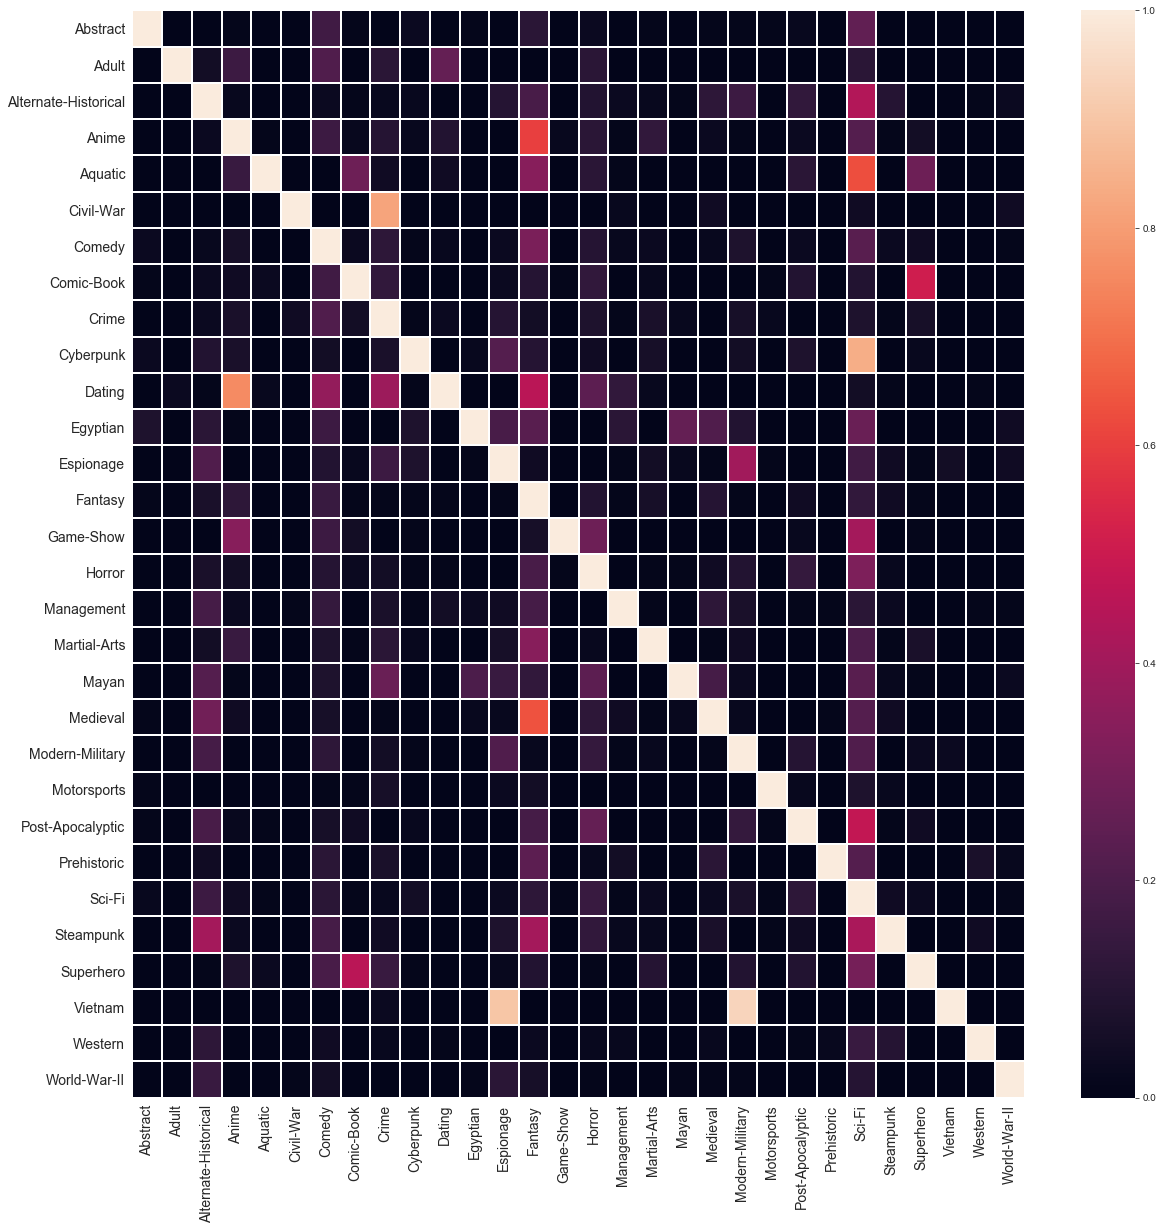

In [31]:
plt.figure(figsize = [20,20])

sns.heatmap(all_counts, linewidth=1, xticklabels=unique, yticklabels=unique)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [93]:
bow_df = df[df.similar_games.notnull()]
bow_df.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
0,2008-07-14 21:49:21,"[review, monster]","[hey, bet, give, tangible, notice, completed, ...",snide,5.0,"[Blinky, Pinky, Pac-Man, Inky, Clyde]","[Cutscene, Achievements, Leaderboard, Original...","[one, popular, arcade, game, time, pac, man, r...","[overview, important, icon, arcade, gaming, or...","[Namco, WiZ]","[Pac-Man, ARCADE-GAME-SERIES]","[Strategy, Puzzle]",Pac-Man,"[Game-Boy, Game-Boy-Advance, Game-Gear, Apple-...","[Bandai-Namco-Entertainment, Thunder-Mountain,...","[Lock-'n'-Chase, Lady-Bug, Katamari-Damacy, Sp...",
1,2008-07-20 01:09:02,"[favorite, combat, rpg, time]","[rambling, one, favorite, game, nerd, alert, f...",snide,5.0,,"[Experience-Points, Micromanagement, Dialogue-...","[icewind, dale, ii, last, game, built, infinit...","[summary, icewind, dale, ii, isometric, party,...",[Black-Isle-Studios],"[Icewind-Dale, Dungeons-&-Dragons, Forgotten-R...",[Role-Playing],Icewind-Dale-II,[PC],[Interplay-Entertainment-Corp.],"[Planescape:-Torment, Baldur's-Gate-II:-Shadow...",[Fantasy]
2,2008-07-21 00:34:06,"[simple, fun]","[something, said, single, minded, purpose, gam...",joseppie,4.0,"[Death, Merlin-the-Wizard, Sumner, Garm, Skorn...","[Teleportation, Cloak, Experience-Points, Boss...","[gauntlet, legend, first, 3d, installment, fra...","[story, mage, named, garm, summoned, demon, sk...",[Midway-Games],[Gauntlet],"[Role-Playing, Brawler]",Gauntlet-Legends,"[PlayStation, Dreamcast, Nintendo-64, Arcade]",[Midway-Games],"[Champions-of-Norrath, Ghostbusters:-Sanctum-o...",[Fantasy]
3,2008-07-21 00:36:10,"[best, around, still]","[last, best, mvp, baseball, serie, mvp, repres...",joseppie,5.0,"[Roger-Clemens, Derrek-Lee, Jonathan-Papelbon,...","[Cover-Athlete, Instant-Replay, Minigames, Art...","[mvp, baseball, baseball, game, ea, sport, gam...","[new, feature, owner, mode, existing, franchis...",[EA-Canada],"[MVP-Baseball, MLB]","[Sports, Baseball]",MVP-Baseball-2005,"[PlayStation-Portable, PlayStation-2, GameCube...",[Electronic-Arts],"[MLB-08:-The-Show, Major-League-Baseball-2K8, ...",
4,2008-07-21 00:44:42,"[thrill, hilarity, ensue]","[need, speed, wanted, act, injection, freshnes...",joseppie,4.0,"[Razor-Callahan, Sergeant-Cross, Mia-Townsend,...","[Speed-Blur, Cutscene, Achievements, Leaderboa...","[cruise, street, rockport, city, keep, away, c...","[overview, need, speed, wanted, release, long,...","[EA-Canada, EA-Black-Box, Ideaworks-Game-Studio]",[Need-for-Speed],"[Driving/Racing, Simulation]",Need-for-Speed:-Most-Wanted,"[Game-Boy-Advance, Mac, PlayStation-2, Xbox-36...","[Electronic-Arts, Pocketeers]","[Forza-Motorsport-2, Test-Drive-Unlimited, Bur...","[Crime, Motorsports]"


In [94]:
bow_df['bag_of_words'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['game_body'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['characters'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['franchises'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['publishers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['game_deck'].apply(lambda x: ' '.join(x)))

In [95]:
bow_df['bag_of_words2'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['characters'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['franchises'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['publishers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['game_deck'].apply(lambda x: ' '.join(x)))

In [96]:
bow_df['bag_of_words3'] = (bow_df['genres'].apply(lambda x: ' '.join(x)) + ' ' + 
 bow_df['characters'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['franchises'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['themes'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['concepts'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['developers'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['platforms'].apply(lambda x: ' '.join(x)) + ' ' +
 bow_df['publishers'].apply(lambda x: ' '.join(x)) + ' ')

In [97]:
bow_df['bow_game_deck'] = bow_df['game_deck'].apply(lambda x: ' '.join(x))

In [98]:
bow_df['bag_of_words'] = bow_df['bag_of_words'].str.lower()
bow_df['bag_of_words2'] = bow_df['bag_of_words2'].str.lower()
bow_df['bag_of_words3'] = bow_df['bag_of_words3'].str.lower()

In [100]:
bow_df = bow_df.drop_duplicates(subset='name')
bow_df.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,...,genres,name,platforms,publishers,similar_games,themes,bag_of_words,bag_of_words2,bag_of_words3,bow_game_deck
0,2008-07-14 21:49:21,"[review, monster]","[hey, bet, give, tangible, notice, completed, ...",snide,5.0,"[Blinky, Pinky, Pac-Man, Inky, Clyde]","[Cutscene, Achievements, Leaderboard, Original...","[one, popular, arcade, game, time, pac, man, r...","[overview, important, icon, arcade, gaming, or...","[Namco, WiZ]",...,"[Strategy, Puzzle]",Pac-Man,"[Game-Boy, Game-Boy-Advance, Game-Gear, Apple-...","[Bandai-Namco-Entertainment, Thunder-Mountain,...","[Lock-'n'-Chase, Lady-Bug, Katamari-Damacy, Sp...",,strategy puzzle overview important icon arcade...,strategy puzzle blinky pinky pac-man inky clyd...,strategy puzzle blinky pinky pac-man inky clyd...,one popular arcade game time pac man released ...
1,2008-07-20 01:09:02,"[favorite, combat, rpg, time]","[rambling, one, favorite, game, nerd, alert, f...",snide,5.0,,"[Experience-Points, Micromanagement, Dialogue-...","[icewind, dale, ii, last, game, built, infinit...","[summary, icewind, dale, ii, isometric, party,...",[Black-Isle-Studios],...,[Role-Playing],Icewind-Dale-II,[PC],[Interplay-Entertainment-Corp.],"[Planescape:-Torment, Baldur's-Gate-II:-Shadow...",[Fantasy],role-playing summary icewind dale ii isometric...,role-playing icewind-dale dungeons-&-dragons ...,role-playing icewind-dale dungeons-&-dragons ...,icewind dale ii last game built infinity engin...
2,2008-07-21 00:34:06,"[simple, fun]","[something, said, single, minded, purpose, gam...",joseppie,4.0,"[Death, Merlin-the-Wizard, Sumner, Garm, Skorn...","[Teleportation, Cloak, Experience-Points, Boss...","[gauntlet, legend, first, 3d, installment, fra...","[story, mage, named, garm, summoned, demon, sk...",[Midway-Games],...,"[Role-Playing, Brawler]",Gauntlet-Legends,"[PlayStation, Dreamcast, Nintendo-64, Arcade]",[Midway-Games],"[Champions-of-Norrath, Ghostbusters:-Sanctum-o...",[Fantasy],role-playing brawler story mage named garm sum...,role-playing brawler death merlin-the-wizard s...,role-playing brawler death merlin-the-wizard s...,gauntlet legend first 3d installment franchise
3,2008-07-21 00:36:10,"[best, around, still]","[last, best, mvp, baseball, serie, mvp, repres...",joseppie,5.0,"[Roger-Clemens, Derrek-Lee, Jonathan-Papelbon,...","[Cover-Athlete, Instant-Replay, Minigames, Art...","[mvp, baseball, baseball, game, ea, sport, gam...","[new, feature, owner, mode, existing, franchis...",[EA-Canada],...,"[Sports, Baseball]",MVP-Baseball-2005,"[PlayStation-Portable, PlayStation-2, GameCube...",[Electronic-Arts],"[MLB-08:-The-Show, Major-League-Baseball-2K8, ...",,sports baseball new feature owner mode existin...,sports baseball roger-clemens derrek-lee jonat...,sports baseball roger-clemens derrek-lee jonat...,mvp baseball baseball game ea sport game ea sp...
4,2008-07-21 00:44:42,"[thrill, hilarity, ensue]","[need, speed, wanted, act, injection, freshnes...",joseppie,4.0,"[Razor-Callahan, Sergeant-Cross, Mia-Townsend,...","[Speed-Blur, Cutscene, Achievements, Leaderboa...","[cruise, street, rockport, city, keep, away, c...","[overview, need, speed, wanted, release, long,...","[EA-Canada, EA-Black-Box, Ideaworks-Game-Studio]",...,"[Driving/Racing, Simulation]",Need-for-Speed:-Most-Wanted,"[Game-Boy-Advance, Mac, PlayStation-2, Xbox-36...","[Electronic-Arts, Pocketeers]","[Forza-Motorsport-2, Test-Drive-Unlimited, Bur...","[Crime, Motorsports]",driving/racing simulation overview need speed ...,driving/racing simulation razor-callahan serge...,driving/racing simulation razor-callahan serge...,cruise street rockport city keep away cop defe...


In [39]:
def displaywc(txt,title):
    
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


In [40]:
rp = bow_df[bow_df.genres.apply(lambda x: 'Role-Playing' in x)]
drive = bow_df[bow_df.genres.apply(lambda x: 'Driving/Racing' in x)]

drive.head()

,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,...,genres,name,platforms,publishers,similar_games,themes,bag_of_words,bag_of_words2,bag_of_words3,bow_game_deck
4,2008-07-21 00:44:42,"[thrill, hilarity, ensue]","[need, speed, wanted, act, injection, freshnes...",joseppie,4.0,"[Razor-Callahan, Sergeant-Cross, Mia-Townsend,...","[Speed-Blur, Cutscene, Achievements, Leaderboa...","[cruise, street, rockport, city, keep, away, c...","[overview, need, speed, wanted, release, long,...","[EA-Canada, EA-Black-Box, Ideaworks-Game-Studio]",...,"[Driving/Racing, Simulation]",Need-for-Speed:-Most-Wanted,"[Game-Boy-Advance, Mac, PlayStation-2, Xbox-36...","[Electronic-Arts, Pocketeers]","[Forza-Motorsport-2, Test-Drive-Unlimited, Bur...","[Crime, Motorsports]",driving/racing simulation overview need speed ...,driving/racing simulation razor-callahan serge...,driving/racing simulation razor-callahan serge...,cruise street rockport city keep away cop defe...
16,2008-07-21 01:01:24,"[horrible, gta, game]","[grand, theft, auto, amazing, serie, many, gam...",star_wars117,1.0,"[Lazlow-Jones, Salvatore-Leone, Antonio-Cipria...","[Easter-Egg, Cutscene, Save-Point, Headshot, D...","[grand, theft, auto, liberty, city, storie, fi...","[general, info, mission, design, liberty, city...",[Rockstar-Leeds],...,"[Driving/Racing, Action-Adventure]",Grand-Theft-Auto:-Liberty-City-Stories,"[PlayStation-Portable, PlayStation-2, iPod, Pl...","[Rockstar-Games, Capcom, Take-Two-Interactive-...","[Driver-'76, The-Simpsons:-Hit-&-Run, Postal-2...","[Comedy, Crime]",driving/racing action-adventure general info m...,driving/racing action-adventure lazlow-jones s...,driving/racing action-adventure lazlow-jones s...,grand theft auto liberty city storie first sto...
18,2008-07-21 01:06:05,[cause],"[running, around, blowing, thing, riding, heli...",indieboy,4.0,"[Rico-Rodriguez, Maria-Kane]","[Speed-Blur, Cutscene, Achievements, Boss-Figh...","[cause, open, world, action, game, play, rico,...","[overview, cause, third, person, sandbox, game...",[Avalanche-Studios],...,"[Action, Driving/Racing, Vehicular-Combat]",Just-Cause,"[PlayStation-2, Xbox-360, Xbox, PlayStation-Ne...",[Eidos-Interactive],"[Mercenaries-2:-World-in-Flames, Mercenaries:-...","[Espionage, Modern-Military]",action driving/racing vehicular-combat overvie...,action driving/racing vehicular-combat rico-ro...,action driving/racing vehicular-combat rico-ro...,cause open world action game play rico rodrigu...
35,2008-07-21 01:18:49,"[great, port, psp]","[grand, theft, auto, vice, city, storie, came,...",star_wars117,4.0,"[Victor-Vance, Lazlow-Jones, Lance-Vance, Rica...","[Easter-Egg, Cutscene, Save-Point, Headshot, D...","[rockstar, recognisable, franchise, return, vi...","[overview, grand, theft, auto, vice, city, sto...","[Rockstar-Leeds, Rockstar-North]",...,"[Action, Driving/Racing]",Grand-Theft-Auto:-Vice-City-Stories,"[PlayStation-Portable, PlayStation-2, PlayStat...",[Rockstar-Games],"[Driver-'76, Postal-2, True-Crime:-New-York-Ci...",[Crime],action driving/racing overview grand theft aut...,action driving/racing victor-vance lazlow-jone...,action driving/racing victor-vance lazlow-jone...,rockstar recognisable franchise return vice ci...
68,2008-07-21 03:18:58,"[project, gotham, racing, quickly, set, bar, h...","[bizarre, creation, come, yet, another, graphi...",bennyishere,5.0,,"[Achievements, Leaderboard, Instant-Replay, Dr...","[project, gotham, racing, franchise, continue,...","[overview, project, gotham, racing, pgr3, one,...",[Bizarre-Creations],...,[Driving/Racing],Project-Gotham-Racing-3,[Xbox-360],[Xbox-Game-Studios],"[GRID, Forza-Motorsport-2, Forza-Motorsport, N...",[Motorsports],driving/racing overview project gotham racing ...,driving/racing project-gotham-racing motorspo...,driving/racing project-gotham-racing motorspo...,project gotham racing franchise continue xbox ...


,date_added,rev_deck,rev_body,reviewer,score,characters,concepts,game_deck,game_body,developers,franchises,genres,name,platforms,publishers,similar_games,themes
14138,2010-11-09 01:40:39,"[ice, black, op, review]","[supa, gangsta]",krixok,5.0,"[Viktor-Reznov, Fidel-Castro, John-F.-Kennedy,...","[Capture-The-Flag, Achievements, Leaderboard, ...","[seventh, installment, long, running, action, ...","[overview, welcome, jungle, call, duty, black,...","[Treyarch, n-Space,-Inc., Raven-Software, Cert...","[Call-of-Duty, Black-Ops]",[First-Person-Shooter],Call-of-Duty:-Black-Ops,"[Mac, Xbox-360, PlayStation-3, Wii, Nintendo-D...","[Activision, Square-Enix-Ltd., Square-Enix]","[Battlefield-Vietnam, Tom-Clancy's-Ghost-Recon...","[Vietnam, Espionage, Modern-Military]"
14142,2010-11-10 00:50:43,"[serie, saved]","[multiplayer, review, black, op, deliver, vari...",shinjiex,5.0,"[Viktor-Reznov, Fidel-Castro, John-F.-Kennedy,...","[Capture-The-Flag, Achievements, Leaderboard, ...","[seventh, installment, long, running, action, ...","[overview, welcome, jungle, call, duty, black,...","[Treyarch, n-Space,-Inc., Raven-Software, Cert...","[Call-of-Duty, Black-Ops]",[First-Person-Shooter],Call-of-Duty:-Black-Ops,"[Mac, Xbox-360, PlayStation-3, Wii, Nintendo-D...","[Activision, Square-Enix-Ltd., Square-Enix]","[Battlefield-Vietnam, Tom-Clancy's-Ghost-Recon...","[Vietnam, Espionage, Modern-Military]"
14146,2010-11-10 15:14:17,"[watch, lag, come]","[may, million, people, trying, play, different...",nycalexdunk,3.0,"[Viktor-Reznov, Fidel-Castro, John-F.-Kennedy,...","[Capture-The-Flag, Achievements, Leaderboard, ...","[seventh, installment, long, running, action, ...","[overview, welcome, jungle, call, duty, black,...","[Treyarch, n-Space,-Inc., Raven-Software, Cert...","[Call-of-Duty, Black-Ops]",[First-Person-Shooter],Call-of-Duty:-Black-Ops,"[Mac, Xbox-360, PlayStation-3, Wii, Nintendo-D...","[Activision, Square-Enix-Ltd., Square-Enix]","[Battlefield-Vietnam, Tom-Clancy's-Ghost-Recon...","[Vietnam, Espionage, Modern-Military]"
14148,2010-11-10 19:22:44,"[classic, formula, done, well]","[call, duty, becoming, like, holiday, getting,...",shivermetimbers,4.0,"[Viktor-Reznov, Fidel-Castro, John-F.-Kennedy,...","[Capture-The-Flag, Achievements, Leaderboard, ...","[seventh, installment, long, running, action, ...","[overview, welcome, jungle, call, duty, black,...","[Treyarch, n-Space,-Inc., Raven-Software, Cert...","[Call-of-Duty, Black-Ops]",[First-Person-Shooter],Call-of-Duty:-Black-Ops,"[Mac, Xbox-360, PlayStation-3, Wii, Nintendo-D...","[Activision, Square-Enix-Ltd., Square-Enix]","[Battlefield-Vietnam, Tom-Clancy's-Ghost-Recon...","[Vietnam, Espionage, Modern-Military]"
14154,2010-11-11 23:49:30,"[liquid, look, call, duty, black, op]","[liquid, look, call, duty, black, op, pc, numb...",liquid1024,5.0,"[Viktor-Reznov, Fidel-Castro, John-F.-Kennedy,...","[Capture-The-Flag, Achievements, Leaderboard, ...","[seventh, installment, long, running, action, ...","[overview, welcome, jungle, call, duty, black,...","[Treyarch, n-Space,-Inc., Raven-Software, Cert...","[Call-of-Duty, Black-Ops]",[First-Person-Shooter],Call-of-Duty:-Black-Ops,"[Mac, Xbox-360, PlayStation-3, Wii, Nintendo-D...","[Activision, Square-Enix-Ltd., Square-Enix]","[Battlefield-Vietnam, Tom-Clancy's-Ghost-Recon...","[Vietnam, Espionage, Modern-Military]"
14155,2010-11-12 00:51:36,"[game, remain]","[making, documentarie, lion, king, one, filmma...",mystyr_e,4.0,"[Viktor-Reznov, Fidel-Castro, John-F.-Kennedy,...","[Capture-The-Flag, Achievements, Leaderboard, ...","[seventh, installment, long, running, action, ...","[overview, welcome, jungle, call, duty, black,...","[Treyarch, n-Space,-Inc., Raven-Software, Cert...","[Call-of-Duty, Black-Ops]",[First-Person-Shooter],Call-of-Duty:-Black-Ops,"[Mac, Xbox-360, PlayStation-3, Wii, Nintendo-D...","[Activision, Square-Enix-Ltd., Square-Enix]","[Battlefield-Vietnam, Tom-Clancy's-Ghost-Recon...","[Vietnam, Espionage, Modern-Military]"
14167,2010-1

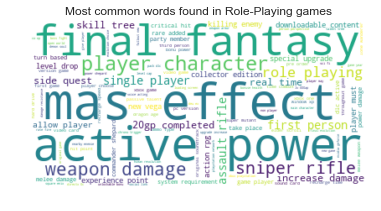

In [41]:
g=rp.bag_of_words.tolist()

txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common words found in Role-Playing games')


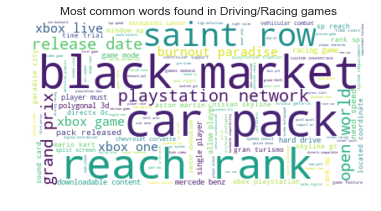

In [42]:
g=drive.bag_of_words.tolist()

txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common words found in Driving/Racing games')

In [101]:
the = bow_df[['themes', 'bag_of_words']]
the.head()

,themes,bag_of_words
0,,strategy puzzle overview important icon arcade...
1,[Fantasy],role-playing summary icewind dale ii isometric...
2,[Fantasy],role-playing brawler story mage named garm sum...
3,,sports baseball new feature owner mode existin...
4,"[Crime, Motorsports]",driving/racing simulation overview need speed ...


In [102]:
gen = bow_df[['genres', 'bag_of_words']]
gen.head()

,genres,bag_of_words
0,"[Strategy, Puzzle]",strategy puzzle overview important icon arcade...
1,[Role-Playing],role-playing summary icewind dale ii isometric...
2,"[Role-Playing, Brawler]",role-playing brawler story mage named garm sum...
3,"[Sports, Baseball]",sports baseball new feature owner mode existin...
4,"[Driving/Racing, Simulation]",driving/racing simulation overview need speed ...


In [104]:
conditions = [(gen.genres.apply(lambda x: 'Action' in x) == True), (gen.genres.apply(lambda x: 'Action-Adventure' in x) == True)]
choices=["Action", "Action-Adventure"]

gen['genre_pair1'] = np.select(conditions,choices)
gen.head()

,genres,bag_of_words,genre_pair1
0,"[Strategy, Puzzle]",strategy puzzle overview important icon arcade...,0
1,[Role-Playing],role-playing summary icewind dale ii isometric...,0
2,"[Role-Playing, Brawler]",role-playing brawler story mage named garm sum...,0
3,"[Sports, Baseball]",sports baseball new feature owner mode existin...,0
4,"[Driving/Racing, Simulation]",driving/racing simulation overview need speed ...,0


In [105]:
conditions = [(gen.genres.apply(lambda x: 'First-Person-Shooter' in x) == True), (gen.genres.apply(lambda x: 'Shooter' in x) == True)]
choices=["First-Person-Shooter", "Shooter"]

gen['genre_pair2'] = np.select(conditions,choices)
gen.head()

,genres,bag_of_words,genre_pair1,genre_pair2
0,"[Strategy, Puzzle]",strategy puzzle overview important icon arcade...,0,0
1,[Role-Playing],role-playing summary icewind dale ii isometric...,0,0
2,"[Role-Playing, Brawler]",role-playing brawler story mage named garm sum...,0,0
3,"[Sports, Baseball]",sports baseball new feature owner mode existin...,0,0
4,"[Driving/Racing, Simulation]",driving/racing simulation overview need speed ...,0,0


In [106]:
conditions = [(the.themes.apply(lambda x: 'Sci-Fi' in x) == True), (the.themes.apply(lambda x: 'Fantasy' in x) == True)]
choices=["Sci-Fi", "Fantasy"]

the['theme_pair1'] = np.select(conditions,choices)
the.head()

,themes,bag_of_words,theme_pair1
0,,strategy puzzle overview important icon arcade...,0
1,[Fantasy],role-playing summary icewind dale ii isometric...,Fantasy
2,[Fantasy],role-playing brawler story mage named garm sum...,Fantasy
3,,sports baseball new feature owner mode existin...,0
4,"[Crime, Motorsports]",driving/racing simulation overview need speed ...,0


In [119]:
theme1 = the[the.theme_pair1 != '0']
theme1.head()

,themes,bag_of_words,theme_pair1
1,[Fantasy],role-playing summary icewind dale ii isometric...,Fantasy
2,[Fantasy],role-playing brawler story mage named garm sum...,Fantasy
8,"[Horror, Sci-Fi]",action shooter overview gear war third person ...,Sci-Fi
9,"[Sci-Fi, Modern-Military, Post-Apocalyptic]",action shooter first-person-shooter vehicular-...,Sci-Fi
10,"[Sci-Fi, Anime]",action shoot-'em-up overview title screen game...,Sci-Fi


In [107]:
pair1 = gen[gen.genre_pair1 != '0']
pair1.head()

,genres,bag_of_words,genre_pair1,genre_pair2
5,"[Action, Shooter]",action shooter overview welcome liberty city g...,Action,Shooter
6,"[Shooter, Action-Adventure]",shooter action-adventure overview old snake me...,Action-Adventure,Shooter
8,"[Action, Shooter]",action shooter overview gear war third person ...,Action,Shooter
9,"[Action, Shooter, First-Person-Shooter, Vehicu...",action shooter first-person-shooter vehicular-...,Action,First-Person-Shooter
10,"[Action, Shoot-'Em-Up]",action shoot-'em-up overview title screen game...,Action,0


In [108]:
pair2 = gen[gen.genre_pair2 != '0']
pair2.head()

,genres,bag_of_words,genre_pair1,genre_pair2
5,"[Action, Shooter]",action shooter overview welcome liberty city g...,Action,Shooter
6,"[Shooter, Action-Adventure]",shooter action-adventure overview old snake me...,Action-Adventure,Shooter
8,"[Action, Shooter]",action shooter overview gear war third person ...,Action,Shooter
9,"[Action, Shooter, First-Person-Shooter, Vehicu...",action shooter first-person-shooter vehicular-...,Action,First-Person-Shooter
15,"[Action, First-Person-Shooter]",action first-person-shooter overview battlefie...,Action,First-Person-Shooter


In [109]:
import en_core_web_sm

nlp = en_core_web_sm.load()


In [114]:
corpus = st.CorpusFromPandas(pair2, 
                            category_col='genre_pair2', 
                            text_col='bag_of_words',
                            nlp=nlp).build()

print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['enemie', 'grenade', 'weapon', 'ammo', 'melee', 'abilitie', 'bonu', 'cutscene', 'previou', 'deathmatch']


In [117]:
html = st.produce_scattertext_explorer(corpus,
              category='First-Person-Shooter',
              category_name='First-Person-Shooter',
              not_category_name='Shooter',
              minimum_term_frequency=500)

file_name = 'FPS_Shoot.html'
open(file_name, 'wb').write(html.encode('utf-8'))

7022839

In [120]:
corpus = st.CorpusFromPandas(theme1, 
                            category_col='theme_pair1', 
                            text_col='bag_of_words',
                            nlp=nlp).build()

print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['enemie', 'abilitie', 'weapon', 'wii', 'variou', 'serie', 'bonu', 'clas', 'gameplay', 'melee']


In [121]:
html = st.produce_scattertext_explorer(corpus,
              category='Sci-Fi',
              category_name='Sci-Fi',
              not_category_name='Fantasy',
              minimum_term_frequency=500)

file_name = 'Scifi_Fantasy.html'
open(file_name, 'wb').write(html.encode('utf-8'))

14883621

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(bow_df['bag_of_words'], 20)
df1 = pd.DataFrame(common_words, columns = ['bag_of_words' , 'counts'])
df1.groupby('bag_of_words').sum()['counts'].sort_values(ascending=False)


bag_of_words
game         607613
player       575548
weapon       253513
one          225135
also         207424
time         193009
new          179345
character    177602
level        166648
damage       152811
mode         146805
first        133875
point        128826
fire         123803
map          122406
attack       122227
enemie       121223
team         118962
two          115360
use          112169
Name: counts, dtype: int64

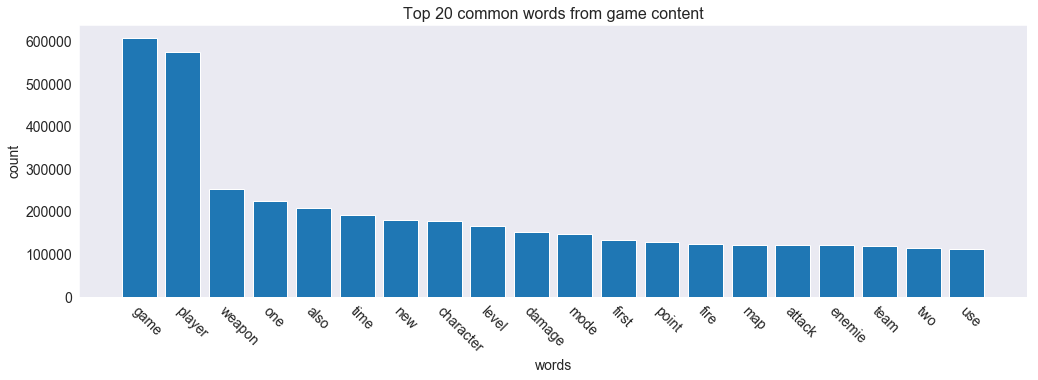

In [45]:
plt.figure(figsize=[17,5])
plt.bar(df1.bag_of_words.values, df1.counts.values)
plt.title('Top 20 common words from game content', fontsize=16)
plt.xticks(fontsize=14, rotation = -45, ha="left", rotation_mode="anchor")
plt.yticks(fontsize=14)
plt.xlabel('words', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

In [46]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(bow_df['bag_of_words'], 20)

df2 = pd.DataFrame(common_words, columns = ['bag_of_words' , 'counts'])
df2.groupby('bag_of_words').sum()['counts'].sort_values(ascending=False)

bag_of_words
first person            26014
xbox 360                24835
single player           24412
allow player            20728
player must             18840
downloadable content    18735
playstation network     18319
game mode               17905
sniper rifle            17561
player character        17286
hard drive              16985
assault rifle           16577
xbox one                16548
system requirement      16016
take place              15706
third person            14870
person perspective      14265
co op                   14192
fire mode               14119
xbox live               14001
Name: counts, dtype: int64

In [84]:
fig, ax = plt.subplots(figsize=[35,10])

ax.bar(df2.bag_of_words.values, df2.counts.values)
ax.set_title('Top 20 common bigrams from game content', fontsize = 35)

ax.set_xlabel('words', fontsize = 30)
ax.set_ylabel('count', fontsize = 30)

ax.set_xticks(range(20))
ax.set_xticklabels(df2.bag_of_words.values, fontsize=40, rotation = -45,  ha="left", rotation_mode="anchor")
ax.tick_params(axis='both', which='major', labelsize=25)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

<Figure size 2520x720 with 0 Axes>

In [48]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(bow_df['bag_of_words'], 20)

df3 = pd.DataFrame(common_words, columns = ['bag_of_words' , 'counts'])
df3.groupby('bag_of_words').sum()['counts'].sort_values(ascending=False)

bag_of_words
first person shooter           9517
xbox 360 playstation           8819
playstation network ps3        8138
360 games store                8130
xbox 360 games                 8130
real time combat               8032
xbox one backwards             7713
one backwards compatibility    7713
original soundtrack release    7477
metal gear solid               7457
third person perspective       7352
pc system requirement          6480
non player character           6386
first person perspective       6303
games on demand                6277
system requirement minimum     6183
action adventure overview      6060
sound card directx             6028
hard drive gb                  5989
network ps3 pc                 5857
Name: counts, dtype: int64

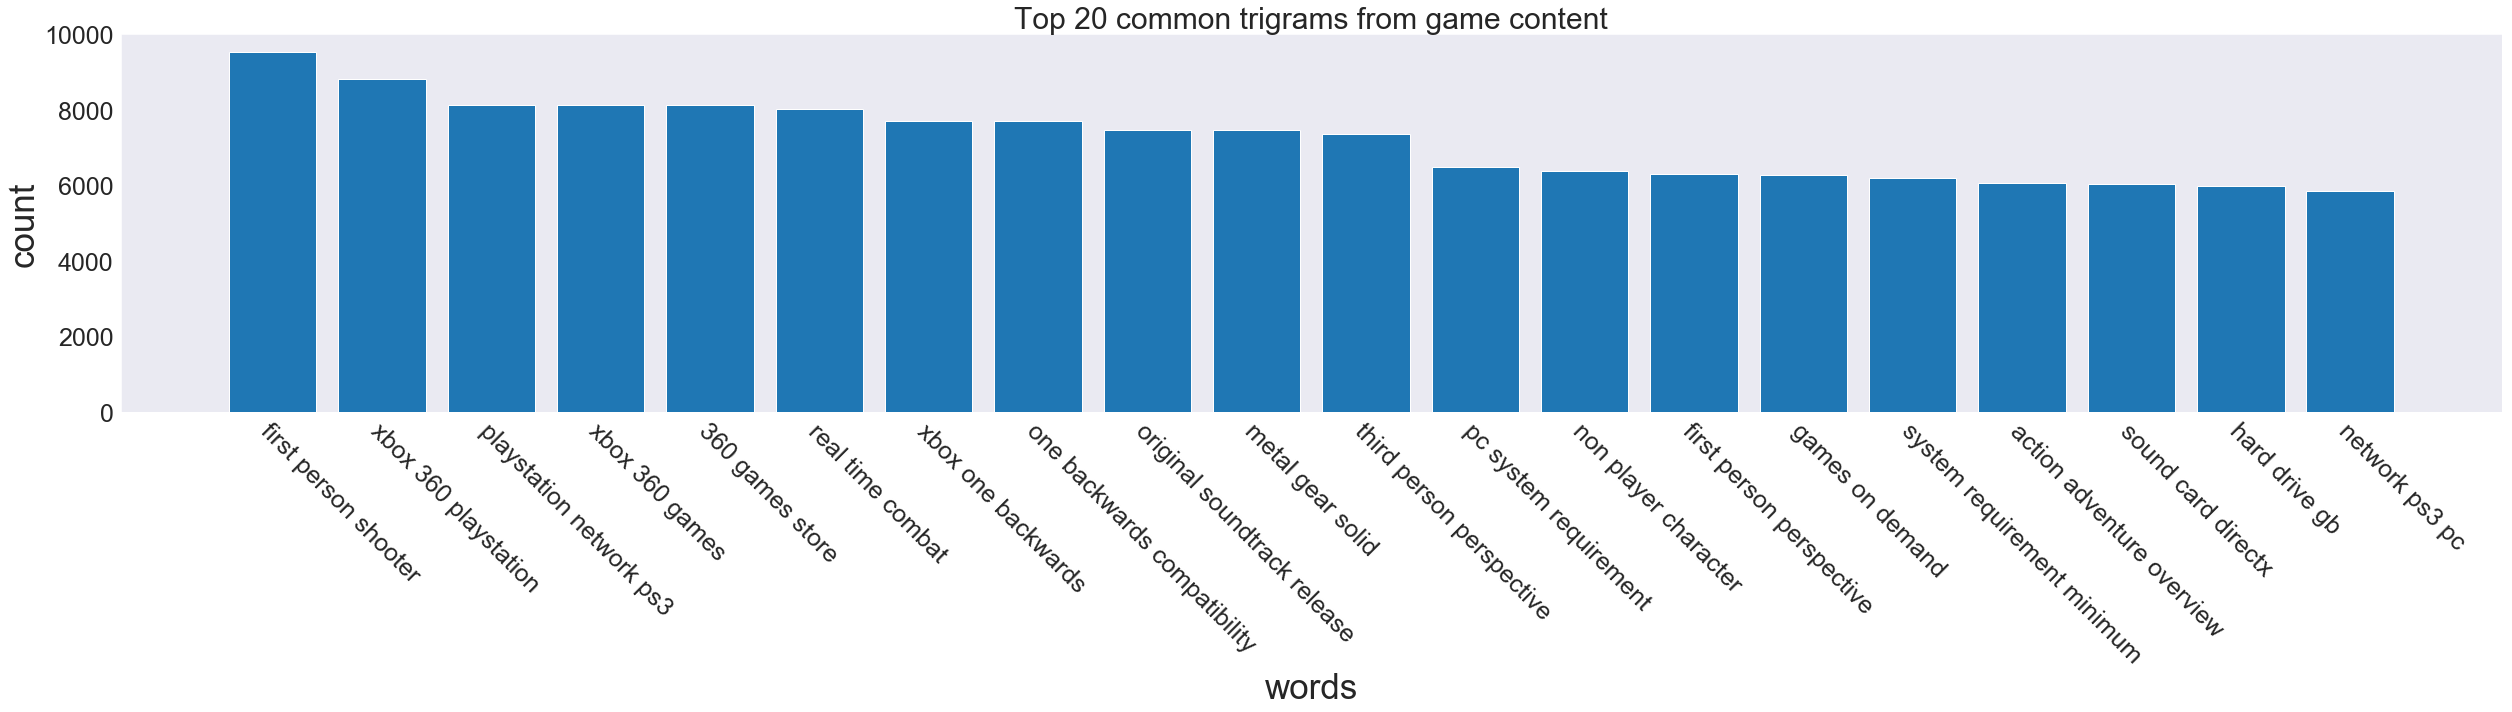

In [49]:
fig, ax = plt.subplots(figsize=[35,10])

ax.bar(df3.bag_of_words.values, df3.counts.values)
ax.set_title('Top 20 common trigrams from game content', fontsize = 30)

ax.set_xlabel('words', fontsize = 35)
ax.set_ylabel('count', fontsize = 35)

ax.set_xticks(range(20))
ax.set_xticklabels(df3.bag_of_words.values, fontsize=35, rotation = -45,  ha="left", rotation_mode="anchor")

ax.tick_params(axis='both', which='major', labelsize=25)


plt.tight_layout()
plt.show()